In [22]:
import emcee
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks,argrelmin
from scipy.stats import median_absolute_deviation
import eleanor
import urllib
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve import TessTargetPixelFile
import eleanor
from astropy.io import ascii,fits
from astropy.table import Table,join
import astropy.units as u
import bokeh
import sys
from scipy.signal import savgol_filter
from requests.exceptions import HTTPError
import matplotlib.gridspec as gridspec
plt.rcParams['font.size']=12
from astropy.coordinates import SkyCoord
import astropy.units as u


#plt.rcParams['font.size']=16

In [19]:
ngc2516mems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_allCGmems.dat')
tfile = '/Users/bhealy/Documents/PhD_Thesis/TOI_Figs/Light_Curves/6_1226_lc.txt'
#tfile = '/Users/bhealy/Documents/PhD_Thesis/TOI_Figs/Light_Curves/19_459_lc.txt'

data = ascii.read(tfile)
t = data['time']
y = (data['flux'] - 1) * 1e3
yerr = (data['flux_err']) * 1e3

In [24]:
ra = ngc2516mems['ra']*u.deg
dec = ngc2516mems['dec']*u.deg
SC = SkyCoord(ra,dec)

In [122]:
#close = np.zeros(len(SC),dtype=bool)
count = np.zeros(len(SC))
#inds = np.zeros(len(SC),dtype=int)
closeids = []
#closeinds = []
for i in range(len(SC)):
    sep = SC[i].separation(SC).arcsec
    #indx = sep != 0
    close = (sep <= 21*2) & (sep != 0)
    count[i] = np.sum(close)
    if count[i] != 0:
        #inds[i] = ngc2516mems['source_id'][close].data
        closeids += [ngc2516mems['source_id'][close].data]
        #closeinds += [i]
        #print(i,ngc2516mems['source_id'][close].data)
    else:
        closeids += [[0]]

        

    

In [158]:
lk.search.search_targetpixelfile('TIC '+ np.str(372913340))

KeyboardInterrupt: 

In [160]:
S = eleanor.Source(tic=372913340)

HTTPError: 400 Client Error: Bad Request: Malformed sector parameter for url: https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=68.95970833333332&dec=-64.02703611111112&y=31&x=31&units=px&sector=37

In [128]:
0 in closeids[913]

False

In [82]:
ngc2516mems['source_id'][1]

5289864726018908544

(array([792.,   0., 248.,   0.,   0.,  53.,   0.,   8.,   0.,   5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

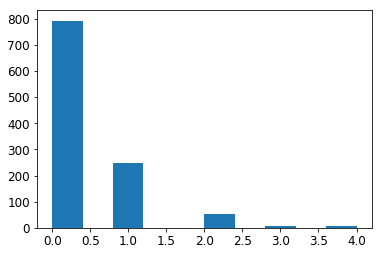

In [74]:
plt.hist(count)

In [57]:
sep = SC[1].separation(SC).arcsec
indx = sep != 0

In [51]:
np.min(sep[sep!= 0])

20.69246154093627

In [58]:
sep[indx] < 21*3

array([False, False, False, ..., False, False, False])

In [11]:
classifications = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_lc_classifications.dat')

In [14]:
np.sum(classifications['classification'] == 'X')

216

In [16]:
classifications['source_id'][classifications['classification'] == 'V']

<Column name='source_id' dtype='int64' length=74>
5289872972356315520
5289885616739974016
5289886407013890688
5289888262439659136
5290011235944456960
5290011235944457088
5290029103008123520
5289992372447986816
5289990207784548736
5290001855735725696
5290002989607023488
5290669328014408192
                ...
5290734680236169344
5290720833262052480
5290720867621791488
5290721997195236480
5290770586163654656
5290740929411321216
5290715988538836224
5290718599879047168
5290696128609865600
5290769727170191232
5290721069482679680
5290726227740737024

In [165]:
indx = ngc2516mems['source_id'] == 5290720455304928512
gaia_ids = ngc2516mems['source_id']


In [204]:
ngc2516mems['ra','dec'].write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_ra_dec.dat',format='ascii')

(18, 5)

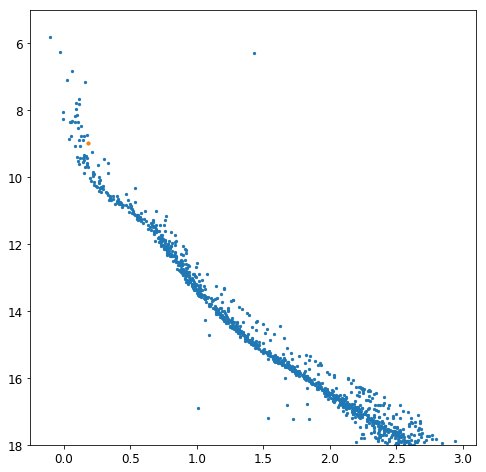

In [166]:
plt.figure(figsize=(8,8))
plt.scatter(ngc2516mems['bp_rp'],ngc2516mems['phot_g_mean_mag'],s=5)
plt.scatter(ngc2516mems['bp_rp'][indx],ngc2516mems['phot_g_mean_mag'][indx],s=10)
plt.ylim(18,5)

In [154]:
ngc2516mems[indx]

<Table length=1>
       ra               dec         ...       proba        cluster 
    float64           float64       ...      float64         str8  
---------------- ------------------ ... ------------------ --------
119.486754211505 -60.84268961751746 ... 0.6000000238418579 NGC_2516

In [42]:
import astroquery.mast.core as core

import astroquery.exceptions

In [41]:
core.NoResultsWarning()

[astroquery.exceptions.NoResultsWarning,
 astropy.utils.exceptions.AstropyWarning,
 Warning,
 Exception,
 BaseException,
 object]

In [43]:
astroquery.exceptions.NoResultsWarning

astroquery.exceptions.NoResultsWarning

In [45]:
import requests.exceptions

In [58]:
gaia_ids[8]

5289877576561348480

In [60]:
#S3 = eleanor.Source(gaia=52907353330_71202944,sector=11,tc=True)
S8 = eleanor.multi_sectors('all',gaia=gaia_ids[8], tc=False)

Found star in Sector(s) 1 4 7 8 10 11
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0160_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0160_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0376_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0376_tess_v2_bkg.fits with expected size 65286720. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0376_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0376_tess_v2_pc.fits with ex

In [61]:
S9 = eleanor.multi_sectors('all',gaia=gaia_ids[9], tc=False)

Found star in Sector(s) 1 4 7 8 10 11
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0106_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0608-0106_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0322_tess_v2_bkg.fits with expected size 65286720. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1784-0322_tess_v2_pc.fits with ex

In [76]:
d1 = eleanor.TargetData(S8[2],height=13,width=13,bkg_size=31,crowded_field=True,do_pca=True)

Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'. [astropy.wcs.wcs]


In [196]:
d2 = eleanor.TargetData(S8[2],height=13,width=13,bkg_size=31,crowded_field=True,do_pca=True)
d3 = eleanor.TargetData(S8[2],height=25,width=25,bkg_size=31,crowded_field=True,do_pca=True)

Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'. [astropy.wcs.wcs]
Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'. [astropy.wcs.wcs]


In [82]:
pos = S8[2].position_on_chip

In [79]:
S8[-1].position_on_chip

array([1948.67779338,  592.96518165])

In [87]:
np.int(pos[0] - size[0]/2)

156

In [88]:
np.int(pos[0] +13/2)

169

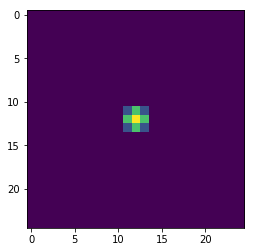

In [197]:
plt.imshow(d3.aperture)

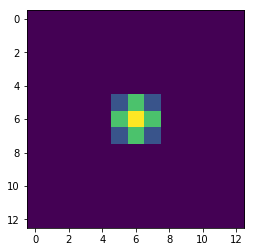

In [198]:
plt.imshow(d2.aperture)

11 11
11 12
11 13
12 11
12 12
12 13
13 11
13 12
13 13


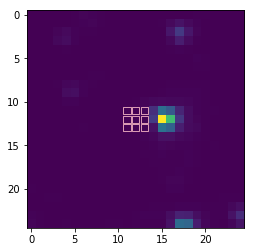

In [199]:
plt.imshow(d3.tpf[0,:,:])
for i in range(d3.aperture.shape[0]):
    for j in range(d3.aperture.shape[1]):
        if d3.aperture[i, j]:
            print(i,j)
            plt.scatter(i,j,color='pink',alpha=.8,marker='s',s=50,facecolors='None')

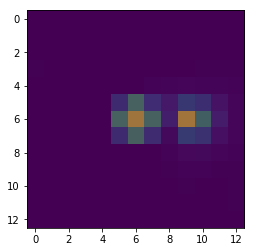

In [200]:
plt.imshow(d2.tpf[0,:,:])
plt.imshow(d2.aperture,alpha=.5)

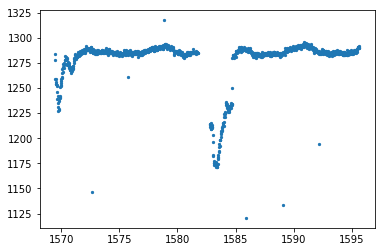

In [136]:
plt.scatter(d2.time,d2.pca_flux,s=5)

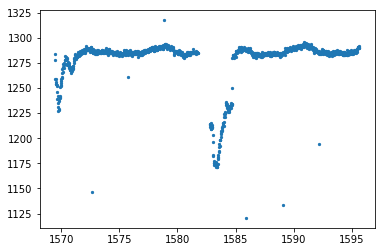

In [137]:
plt.scatter(d3.time,d3.pca_flux,s=5)

In [138]:
np.sum(d2.aperture)

4.908738521234052

In [139]:
np.sum(d3.aperture)

4.908738521234052

In [141]:
d2.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   88 / width of table in bytes                        
NAXIS2  =                 1211 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    8 / number of fields in each row                   
TTYPE1  = 'TSTART  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'TSTOP   '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'BARYCORR'        

In [161]:
#S = eleanor.Source(gaia=5290673446882839424,sector=4,tc=True)
try:
    S2 = eleanor.Source(gaia=5290720657163454080,sector=9,tc=False)
except astroquery.exceptions.NoResultsWarning:
    print(':(')
except requests.exceptions.HTTPError:
    print(':-<')

INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0009-3-3-cal-2018-0376_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0009-3-3-cal-2018-0376_tess_v2_bkg.fits with expected size 71072640. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0009-3-3-cal-2018-0376_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0009-3-3-cal-2018-0376_tess_v2_pc.fits with expected size 142246080. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0009-3-3-cal-2018-0376_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0009-3-3_tess_v2_pm.txt with expected size 214668. [astroquery.query]


In [133]:
data = eleanor.TargetData(S2,do_psf=True,do_pca=True)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


Set DATE-BEG to '2019-02-28T17:33:21.950' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1154/1154 [00:10<00:00, 105.17it/s]


In [134]:
V = eleanor.Visualize(data)

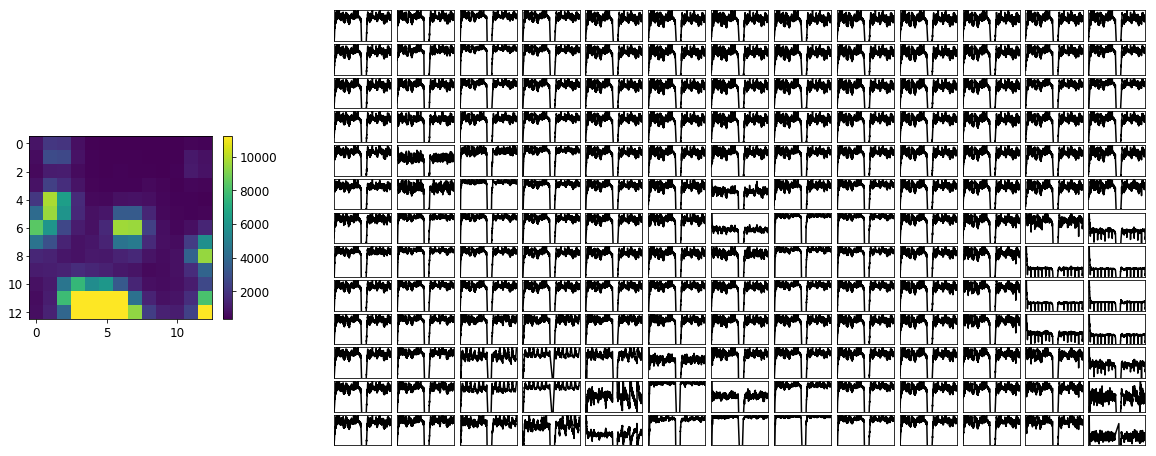

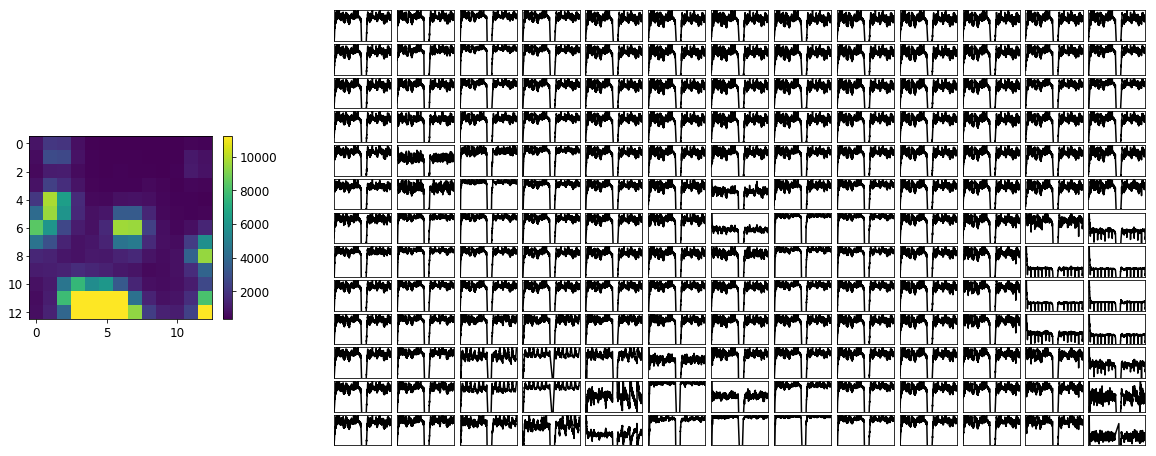

In [136]:
V.pixel_by_pixel()#(colrange=[4,9],rowrange=[2,6])

In [4]:
ngc2516mems

<Table length=1106>
        ra                 dec         ...        proba        cluster 
     float64             float64       ...       float64         str8  
------------------ ------------------- ... ------------------- --------
119.64282668758783 -61.452193604045654 ...   0.699999988079071 NGC_2516
119.19350058863937  -61.58236060631561 ... 0.30000001192092896 NGC_2516
119.86335546049123 -61.516366132126194 ...   0.800000011920929 NGC_2516
119.98137591874814   -61.4038632769621 ...   0.800000011920929 NGC_2516
120.05924491233837 -61.452871822988726 ...                 0.5 NGC_2516
119.94306775020152 -61.428719187448785 ... 0.20000000298023224 NGC_2516
119.72947963777617 -61.628932899579574 ...   0.800000011920929 NGC_2516
119.67760602546025 -61.638058241591146 ...   0.800000011920929 NGC_2516
120.29485215570632  -61.52424220218858 ...                 0.5 NGC_2516
121.13929660975464  -61.34479131354677 ...   0.800000011920929 NGC_2516
               ...                 ... ...                 ...      ...
119.90480063218293  -59.85712405549999 ...                 0.5 NGC_2516
119.41804083081743  -60.01315402742155 ... 0.20000000298023224 NGC_2516
119.32822384746801 -60.258156207121914 ...   0.699999988079071 NGC_2516
119.40781456963013  -60.00823890355261 ...  0.8999999761581421 NGC_2516
119.95968511098653 -59.967009966018146 ... 0.30000001192092896 NGC_2516
119.80516236336322  -59.89524089457263 ... 0.20000000298023224 NGC_2516
119.31421518456791  -60.26770367545517 ...  0.8999999761581421 NGC_2516
119.62697416831926 -60.157774012693494 ...   0.800000011920929 NGC_2516
119.39433047854344   -60.2066996923345 ...   0.699999988079071 NGC_2516
119.42483707629846  -60.08790159347961 ...                 0.5 NGC_2516

In [73]:
delta_t = np.median(np.diff(t))
y_interp = np.interp(np.arange(t.min(), t.max(), delta_t),
                     t, y)
emp_acorr = emcee.autocorr.function_1d(y_interp) * np.var(y_interp)
#emp_acorr = emcee.autocorr.function_1d(y) * np.var(y)

In [52]:
new_t = np.arange(t.min(), t.max(), delta_t)

In [53]:
new_t

array([1505.4909902 , 1505.51180334, 1505.53261648, ..., 1527.88592432,
       1527.90673746, 1527.9275506 ])

In [7]:
gaia_ids = ngc2516mems['source_id']

In [138]:
def get_toi_lc(n,mems,size=(13,13),sigma_thresh=5,tpfplot=False):

    #srch = lk.search_tesscut('TIC '+np.str(ticids[n]))
    
    #tpfcoll = srch.download_all(cutout_size=size)
    #apers = np.zeros((len(tpfcoll),size[0],size[1]))
    #for i in range(len(tpfcoll)):
    #    apers[i,:,:] = tpfcoll[i].create_threshold_mask(sigma_thresh)
    #    if tpfplot:
    #        tpfcoll[i].plot(aperture_mask=apers[i])
    gaia_ids = mems['source_id']
    #S = eleanor.multi_sectors('all',gaia = bsourceids[n], tc=True)
    #S = eleanor.multi_sectors('all',gaia = 5290720867621791872, tc=True)
    S = eleanor.multi_sectors('all',gaia=gaia_ids[n], tc=False)

    t = np.array([])
    f = np.array([])
    e = np.array([])

    pca_t = np.array([])
    pca_f = np.array([])
    pca_e = np.array([])
    
    psf_t = np.array([])
    psf_f = np.array([])
    psf_e = np.array([])
    
    raw_t = np.array([])
    raw_f = np.array([])
    raw_e = np.array([])
    for i in range(len(S)):
        #if S[i].position_on_chip[0] > 0 and S[i].position_on_chip[1] > 0:
        try:
            tempdata = eleanor.TargetData(S[i], height=size[0], width=size[1], bkg_size=31, do_psf=True, do_pca=True)
            #TPF = TessTargetPixelFile(S[i].cutout)
            #apers = TPF.create_threshold_mask(5)
            apers = np.zeros((31,31))
            apers[9:22,9:22]=tempdata.aperture
            
            #tempdata.save('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            #TPF = TessTargetPixelFile('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            
            #tempdata.get_lightcurve(apers)
            
            q0 = tempdata.quality == 0
            t = np.append(t,tempdata.time[q0])
            f = np.append(f,tempdata.corr_flux[q0]/np.nanmedian(tempdata.corr_flux[q0]))
            e = np.append(e,tempdata.flux_err[q0]/tempdata.corr_flux[q0])
            pca_t = np.append(pca_t,tempdata.time[q0])
            pca_f = np.append(pca_f,tempdata.pca_flux[q0]/np.nanmedian(tempdata.pca_flux[q0]))
            pca_e = np.append(pca_e,tempdata.flux_err[q0]/tempdata.pca_flux[q0])
            psf_t = np.append(psf_t,tempdata.time[q0])
            psf_f = np.append(psf_f,tempdata.psf_flux[q0]/np.nanmedian(tempdata.psf_flux[q0]))
            psf_e = np.append(psf_e,tempdata.flux_err[q0]/tempdata.psf_flux[q0])
            #raw_t = np.append(raw_t,tempdata.time[q0])
            #raw_f = np.append(raw_f,tempdata.raw_flux[q0]/np.nanmedian(tempdata.raw_flux[q0]))

            
        #else:
        #except ValueError:
        #    print('Skipping sector - not observed here.')
        except urllib.error.HTTPError:
            print('Skipping sector - timeout')

    lc=lk.LightCurve(time=t,flux=f,flux_err=e)
    lc_pca=lk.LightCurve(time=pca_t,flux=pca_f,flux_err=pca_e)
    lc_psf=lk.LightCurve(time=psf_t,flux=psf_f,flux_err=psf_e)

    #lc_raw=lk.LightCurve(time=raw_t,flux=raw_f)

    #tpf_p=TPF.plot(aperture_mask=apers)
    #tpf_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/TOI_Figs/TPFs/'+np.str(n)+'_'+np.str(Xmatch[n]['TOI'])+'_tpf.pdf')
    
    #return lc, TPF, apers
    return lc, lc_pca, lc_psf, apers

def get_acf_period(lc):
    #t = data['time']
    #y = (data['flux'] - 1) * 1e3
    #yerr = (data['flux_err']) * 1e3
    
    t = lc.time
    y = lc.flux -1 * 1e3
    yerr = lc.flux_err * 1e3
    
    delta_t = np.median(np.diff(t))
    new_t = np.arange(t.min(), t.max(), delta_t)
    y_interp = np.interp(new_t, t, y)
    emp_acorr = emcee.autocorr.function_1d(y_interp) #* np.var(y_interp)
    
    #emp_acorr = emcee.autocorr.function_1d(y) * np.var(y)
    
    new_f = np.zeros(len(new_t))
    
    for i in range(len(lc.time)):
        t_diffs = np.abs(new_t - t[i])
        minindx = np.argmin(t_diffs)
        new_f[minindx] = y[i]
        
    #emp_acorr = emcee.autocorr.function_1d(new_f)

    #tau = np.arange(len(emp_acorr)) * delta_t

    emp_acorr_smooth = gaussian_filter1d(emp_acorr,350*delta_t)
    #print(emp_acorr_smooth)
    peakinds = find_peaks(emp_acorr_smooth)[0]
    #print(peakinds)
    valinds = argrelmin(emp_acorr_smooth)[0]
    #print(valinds)
    
    tau = np.arange(len(emp_acorr_smooth)) * delta_t
    
    #emp_acorr_smooth[peakinds[0]] - emp_acorr_smooth[peakinds[1]] > 0
    peakheights = np.zeros(len(peakinds)-1) 
    for i in range(len(peakinds)-1):
        peakheights[i] = np.mean((emp_acorr_smooth[peakinds[i]]-emp_acorr_smooth[valinds[i]], emp_acorr_smooth[peakinds[i]]-emp_acorr_smooth[valinds[i+1]]))
   
    #print(peakheights)    
    maxindx = np.argmax(peakheights)
    if maxindx == 1:
        maxindx = 1
        #print('!')

    elif maxindx != 1:
        maxindx = 0
        
    period=tau[peakinds[maxindx]]
    #print(period)
    maxheight=peakheights[maxindx]
    
    integerinds = np.array([2,3,4,5],dtype=int)
    integermults = [period * n for n in range(2,6)]
    
    tau_prev = period
    periodmults = np.array([])
    linfit_peakinds = np.array([],dtype=int)
    peakdiffs = np.zeros(len(peakinds)-1)
    n = 1
    #for i in range(len(integermults)):
    #    for j in range(len(peakinds)):
    #        if (np.abs(integermults[i] - tau[peakinds[j]])/period <= 0.1) & ((tau[peakinds[j]]-tau_prev) > 0.5*period):
    #            #print(i,j)
    #            periodmults = np.concatenate((periodmults,[tau[peakinds[j]]]))
    #            tau_prev = tau[peakinds[j]]
    #            linfit_peakinds = np.concatenate((linfit_peakinds,[np.int(j)]))
    #            n += 1
                
    for i in range(len(integermults)):
        for j in range(len(peakinds)-1):
            peakdiffs[j] = np.abs(integermults[i] - tau[peakinds[j]])/period
        if np.min(peakdiffs) <= 0.2: # change to 0.2?
            jj = np.argmin(peakdiffs)
            if peakheights[jj]>= 0.1:
                periodmults = np.concatenate((periodmults,[tau[peakinds[jj]]]))
            #linfit_peakinds = np.concatenate((linfit_peakinds,[np.int(jj)]))
                linfit_peakinds = np.concatenate((linfit_peakinds,[integerinds[i]]))
                n += 1
            #if (np.abs(integermults[i] - tau[peakinds[j]])/period <= 0.1) & ((tau[peakinds[j]]-tau_prev) > 0.5*period):
                #print(i,j)
                #periodmults = np.concatenate((periodmults,[tau[peakinds[j]]]))
                #tau_prev = tau[peakinds[j]]
                #linfit_peakinds = np.concatenate((linfit_peakinds,[np.int(j)]))
                
                

    tauslice = tau[valinds[maxindx]:valinds[maxindx+1]]
    acfslice = emp_acorr_smooth[valinds[maxindx]:valinds[maxindx+1]]
    #plt.plot(tauslice,acfslice)
    #plt.show()
    
    #absdiffs = np.abs(maxheight/2 - acfslice)
    absdiffs = np.abs(maxheight/2 - np.abs(acfslice))
    #print(absdiffs)
    #print(maxheight)
    #print(acfslice)
    minval1 = np.argmin(absdiffs)
    absdiffs=np.delete(absdiffs,minval1)
    minval2 = np.argmin(absdiffs)
    #print(minval1,minval2)
    #print(tauslice)
    #print(tauslice[minval1])
    #
    sigma_from_fwhm = (np.abs(period - tauslice[minval1]) + np.abs(period - tauslice[minval2]))/2.35482004503
    if (minval1 == minval2) | (minval1 == minval2+1) | (minval1 == minval2-1):
            #print('!')
            sigma_from_fwhm = (np.abs(period - tauslice[minval1]) * 2)/2.35482004503
            #print(sigma_from_fwhm)

    #print(sigma_from_fwhm)
    
    linfit_peakinds = np.concatenate(([maxindx],linfit_peakinds))
    #linfit_peakinds += 1
    linfit_peakinds = np.concatenate(([0],linfit_peakinds))
    #if linfit_peakinds[1] == 2:
    #    linfit_peakinds = linfit_peakinds / 2
    #print(linfit_peakinds)
    if linfit_peakinds[1] == 0:
        linfit_peakinds[1] = 1
    
    #print(np.str(n))
    if n > 1:
        #print('!')
        periodmults = np.concatenate(([0,period],periodmults))
        period_diffs = np.diff(periodmults)
        #print(period_diffs)
        #finalperiod = np.median(period_diffs)
        finalperiod = np.polyfit(linfit_peakinds,periodmults,1)[0]
        #print(linfit_peakinds)
        #print(periodmults)
    
    
        #print(median_absolute_deviation(period_diffs))
        #print(np.std(period_diffs))
        #print(n)
        period_unc = 1.483* median_absolute_deviation(period_diffs) / np.sqrt(n-1)
        if period_unc == 0:
            period_unc = np.std(period_diffs) / np.sqrt(n-1)
    
    elif n == 1:
        periodmults = np.array([0,period])
        period_unc = sigma_from_fwhm
        finalperiod = period
    
    
    return finalperiod, period_unc, tau, emp_acorr_smooth, peakinds, valinds, maxheight, periodmults

def get_lc_and_period(n,mems,size=(13,13),sigma_thresh=5,tpfplot=False):

    #srch = lk.search_tesscut('TIC '+np.str(ticids[n]))
    
    #tpfcoll = srch.download_all(cutout_size=size)
    #apers = np.zeros((len(tpfcoll),size[0],size[1]))
    #for i in range(len(tpfcoll)):
    #    apers[i,:,:] = tpfcoll[i].create_threshold_mask(sigma_thresh)
    #    if tpfplot:
    #        tpfcoll[i].plot(aperture_mask=apers[i])
    gaia_ids = mems['source_id']
    #S = eleanor.multi_sectors('all',gaia = bsourceids[n], tc=True)
    #S = eleanor.multi_sectors('all',gaia = 5290720867621791872, tc=True)
    
    S = eleanor.multi_sectors('all',gaia=gaia_ids[n], tc=True)
    #S = eleanor.multi_sectors([2,3,4,5,6,7,8,9,10,11,12,13],gaia=gaia_ids[n], tc=True)
    if S[0].sector == 1:
        S = S[1:]

    t = np.array([])
    f = np.array([])
    e = np.array([])

    pca_t = np.array([])
    pca_f = np.array([])
    pca_e = np.array([])
    
    psf_t = np.array([])
    psf_f = np.array([])
    psf_e = np.array([])
    
    raw_t = np.array([])
    raw_f = np.array([])
    raw_e = np.array([])
    
    all_maxheights = np.zeros(len(S))
    all_periods = np.copy(all_maxheights)
    all_period_uncs = np.copy(all_maxheights)
    #sectors = np.zeros(len(S)-1,dtype=int)
    
    for i in range(len(S)):
        #print(i)
        #if S[i].position_on_chip[0] > 0 and S[i].position_on_chip[1] > 0:
        try:
            tempdata = eleanor.TargetData(S[i], height=size[0], width=size[1], bkg_size=31, do_psf=False, do_pca=True, crowded_field=True)
            #TPF = TessTargetPixelFile(S[i].cutout)
            #apers = TPF.create_threshold_mask(5)
            apers = np.zeros((31,31))
            apers[9:22,9:22]=tempdata.aperture
            
            #tempdata.save('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            #TPF = TessTargetPixelFile('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            
            #tempdata.get_lightcurve(apers)
            #sectors[i] = S[i].sector
            q0 = tempdata.quality == 0
            
            pca_t = np.append(pca_t,tempdata.time[q0])
            pca_f = np.append(pca_f,tempdata.pca_flux[q0]/np.nanmedian(tempdata.pca_flux[q0]))
            pca_e = np.append(pca_e,tempdata.flux_err[q0]/tempdata.pca_flux[q0])
            
            single_lc_pca=lk.LightCurve(time=tempdata.time[q0],flux=tempdata.pca_flux[q0]/np.nanmedian(tempdata.pca_flux[q0]),flux_err=tempdata.flux_err[q0]/tempdata.pca_flux[q0])
            single_lc_pca = single_lc_pca.remove_nans().remove_outliers()
            middletime = (single_lc_pca.time[0] + single_lc_pca.time[-1])/2
            goodindx = (single_lc_pca.time < (middletime - 1.)) | (single_lc_pca.time > (middletime + 2.))
            single_lc_pca = lk.LightCurve(time = single_lc_pca.time[goodindx], flux = single_lc_pca.flux[goodindx], flux_err = single_lc_pca.flux_err[goodindx])
            
            finalperiod, period_unc, tau, emp_acorr_smooth, peakinds, valinds, maxheight, periodmults = get_acf_period(single_lc_pca)
            all_maxheights[i] = maxheight
            #t = np.append(t,tempdata.time[q0])
            #f = np.append(f,tempdata.corr_flux[q0]/np.nanmedian(tempdata.corr_flux[q0]))
            #e = np.append(e,tempdata.flux_err[q0]/tempdata.corr_flux[q0])
            pca_t = np.append(pca_t,tempdata.time[q0])
            pca_f = np.append(pca_f,tempdata.pca_flux[q0]/np.nanmedian(tempdata.pca_flux[q0]))
            pca_e = np.append(pca_e,tempdata.flux_err[q0]/tempdata.pca_flux[q0])
            #psf_t = np.append(psf_t,tempdata.time[q0])
            #psf_f = np.append(psf_f,tempdata.psf_flux[q0]/np.nanmedian(tempdata.psf_flux[q0]))
            #psf_e = np.append(psf_e,tempdata.flux_err[q0]/tempdata.psf_flux[q0])
            #raw_t = np.append(raw_t,tempdata.time[q0])
            #raw_f = np.append(raw_f,tempdata.raw_flux[q0]/np.nanmedian(tempdata.raw_flux[q0]))

            
        #else:
        except ValueError:
            print('Skipping sector - not observed here.')
            
        #except urllib.error.HTTPError:
        #    print('Skipping sector - timeout')
    
    bestindx = np.argmax(all_maxheights)
    #bestsector = sectors[bestindx]
    #print(all_maxheights)
    #print(bestsector)
    
    tempdata = eleanor.TargetData(S[bestindx], height=size[0], width=size[1], bkg_size=31, do_psf=False, do_pca=True, crowded_field=True)
    TPF = TessTargetPixelFile(S[bestindx].cutout)
            #apers = TPF.create_threshold_mask(5)
    apers = np.zeros((31,31))
    apers[9:22,9:22]=tempdata.aperture
    #print(S[bestindx].gaia)
            #tempdata.save('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            #TPF = TessTargetPixelFile('/Users/bhealy/Documents/PhD_Thesis/TPFs/TPF_TIC_'+np.str(ticids[n])+'.fits')
            
            #tempdata.get_lightcurve(apers)
    #sectors[i] = S[i].sector
    q0 = tempdata.quality == 0
    
    
    #single_lc_pca=lk.LightCurve(time=pca_t[q0],flux=pca_f[q0],flux_err=pca_e[q0])
    single_lc_pca=lk.LightCurve(time=tempdata.time[q0],flux=tempdata.pca_flux[q0]/np.nanmedian(tempdata.pca_flux[q0]),flux_err=tempdata.flux_err[q0]/tempdata.pca_flux[q0])
    single_lc_pca = single_lc_pca.remove_nans().remove_outliers()
    middletime = (single_lc_pca.time[0] + single_lc_pca.time[-1])/2
    goodindx = (single_lc_pca.time < (middletime - 1.)) | (single_lc_pca.time > (middletime + 2.))
    single_lc_pca = lk.LightCurve(time = single_lc_pca.time[goodindx], flux = single_lc_pca.flux[goodindx], flux_err = single_lc_pca.flux_err[goodindx])
            
    t_start = single_lc_pca.time[0] - 1
    t_end = single_lc_pca.time[-1] + 1
    finalperiod, period_unc, tau, emp_acorr_smooth, peakinds, valinds, maxheight, periodmults = get_acf_period(single_lc_pca)
    
    #lc=lk.LightCurve(time=t,flux=f,flux_err=e)
    lc_pca=lk.LightCurve(time=pca_t,flux=pca_f,flux_err=pca_e)
    #lc_psf=lk.LightCurve(time=psf_t,flux=psf_f,flux_err=psf_e)

    #lc_raw=lk.LightCurve(time=raw_t,flux=raw_f)

    #tpf_p=TPF.plot(aperture_mask=apers)
    #tpf_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/TOI_Figs/TPFs/'+np.str(n)+'_'+np.str(Xmatch[n]['TOI'])+'_tpf.pdf')
    
    #return lc, TPF, apers
    return lc_pca, TPF, apers, finalperiod, period_unc, tau, emp_acorr_smooth, peakinds, valinds, maxheight, t_start, t_end, periodmults


In [139]:
lc, lc_pca, lc_psf, apers = get_toi_lc(359,ngc2516mems)

Found star in Sector(s) 1 4 7 8 9 10 11
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0706-0052_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0706-0052_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0706-0052_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0706-0052_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-0706-0052_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163. [astroquery.query]
INFO: Found cached file /Users/bhealy/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1882-0484_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-4-4-cal-1882-0484_tess_v2_bkg.fits with expected size 652

Set DATE-BEG to '2018-07-25T19:30:10.121' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1282/1282 [00:14<00:00, 89.20it/s]
Set DATE-BEG to '2018-10-19T09:59:44.361' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1060/1060 [00:11<00:00, 92.20it/s]
Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1093/1093 [00:10<00:00, 101.96it/s]
Set DATE-BEG to '2019-02-02T20:32:58.600' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 968/968 [00:10<00:00, 92.65it/s] 


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


Set DATE-BEG to '2019-02-28T17:33:21.950' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1154/1154 [00:14<00:00, 81.79it/s]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


Set DATE-BEG to '2019-03-26T22:33:21.750' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1211/1211 [00:14<00:00, 86.16it/s] 


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


Set DATE-BEG to '2019-04-23T06:31:47.566' from MJD-BEG'. [astropy.wcs.wcs]
100%|██████████| 1248/1248 [00:12<00:00, 101.84it/s]


In [113]:
S.cutout

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1c4cc3ac50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1c4cc54e48>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1c4cb3bc50>]

In [126]:
td1 = eleanor.TargetData(S)

In [127]:
td1.aperture

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [107]:
phdu = S.cutout[0]
phdu

In [108]:
bhdu = S.cutout[1]
bhdu

In [109]:
ihdu = S.cutout[2]
ihdu

In [106]:
bhdu.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '961J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(31, 31)'
    name = 'FLUX'; format = '961E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(31, 31)'
    name = 'FLUX_ERR'; format = '961E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(31, 31)'
    name = 'FLUX_BKG'; format = '961E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(31, 31)'
    name = 'FLUX_BKG_ERR'; format = '961E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(31, 31)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)

In [114]:
from astropy.io.fits import PrimaryHDU, BinTableHDU, ImageHDU

In [169]:
td = eleanor.TargetData(S2)

Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'. [astropy.wcs.wcs]
Set DATE-BEG to '2019-01-08T03:01:26.282' from MJD-BEG'.


In [142]:
nphdu = PrimaryHDU()

In [168]:
S2.position_on_chip

array([184.07213273, 616.69201115])

(1310.4164417324546, 1638.7925290762184)

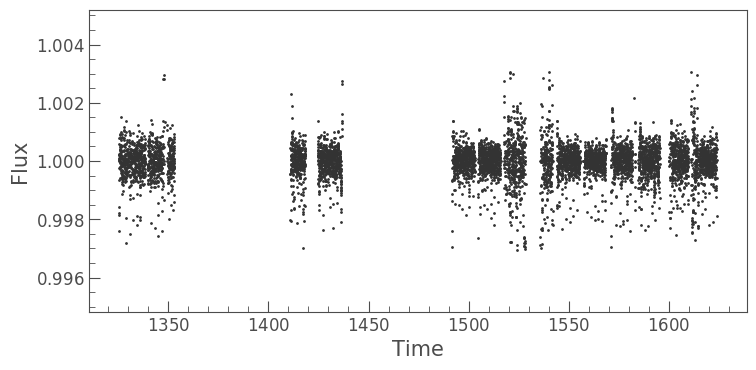

In [155]:
goodlc = lc_pca.flatten().remove_outliers()
goodlc.scatter()
plt.xlim()

`period` contains 131258 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


(0, 5)

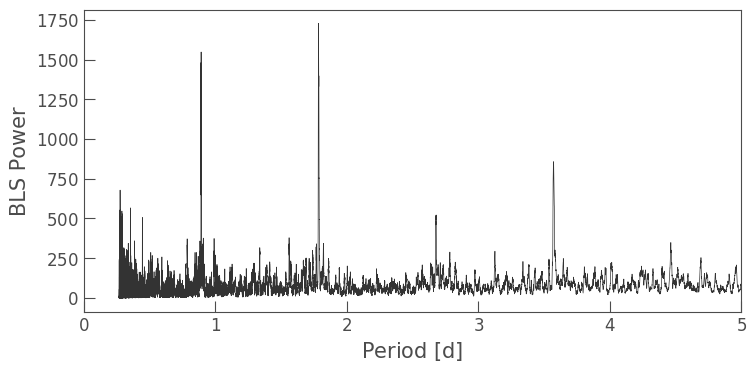

In [142]:
goodpdg = goodlc.to_periodogram(method='bls')
goodpdg.plot(view='period')
plt.xlim(0,5)

In [143]:
goodpdg.period_at_max_power

<Quantity 1.78554748 d>

In [144]:
TPF.plot(aperture_mask=apers)

NameError: name 'TPF' is not defined

In [48]:
apers

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0

In [145]:
TPF.interact_sky()


NameError: name 'TPF' is not defined

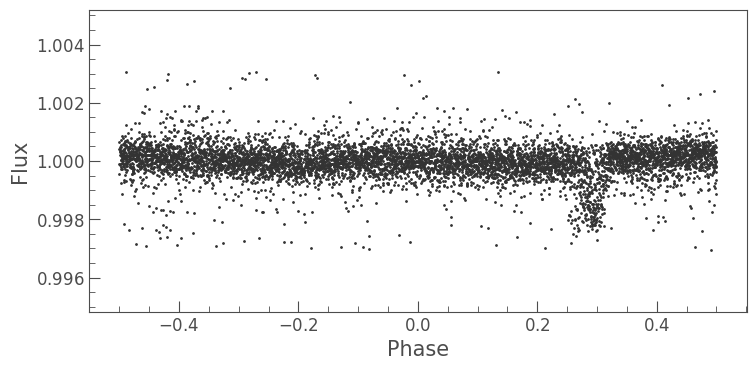

In [164]:
goodlc.fold(1.7855475).scatter()
#plt.xlim(.1,.3)

#plt.xlim(-.25,0)
#plt.ylim(.99,1.01)

In [1]:
goodlc.fold(3.2154108).scatter()

NameError: name 'goodlc' is not defined

In [658]:
#periods = np.zeros(len(toi_unique))
periods = np.zeros(len(ngc2516mems))
period_uncs = np.copy(periods)
except_count = 0
#for n in range(len(ngc2516mems)):
for n in range(718,719):
    for attempt in range(10):
        try:
    #for n in range(38,len(ngc2516mems)):
    #for n in range(28,29):
    #for n in range(0,3):
    #for n in range(165,168):
            gaia_id = np.str(ngc2516mems['source_id'][n])
            gmag = np.str(np.round(ngc2516mems['phot_g_mean_mag'][n],2))
            print(n, gaia_id)
            #toi = toi_unique[n]

            #planets = toi_dict[toi_unique[n]]

            #lc, TPF, apers = get_toi_lc(n,ticids)
            #lc, TPF, apers = get_toi_lc(n,ngc2516mems)

            lc_pca, TPF, apers, periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight, t_start, t_end, periodmults = get_lc_and_period(n,ngc2516mems)

            lc_pca = lc_pca.remove_nans().remove_outliers()
            single_indx = (lc_pca.time > t_start) & (lc_pca.time < t_end)
            single_lc_pca = lk.LightCurve(time=lc_pca.time[single_indx], flux = lc_pca.flux[single_indx], flux_err = lc_pca.flux_err[single_indx])
            middletime = (single_lc_pca.time[0] + single_lc_pca.time[-1])/2
            goodindx = (single_lc_pca.time < (middletime - 1.)) | (single_lc_pca.time > (middletime + 2.))
            single_lc_pca = lk.LightCurve(time = single_lc_pca.time[goodindx], flux = single_lc_pca.flux[goodindx], flux_err = single_lc_pca.flux_err[goodindx])
            #repl_lc = cleanlc


            #periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(repl_lc)
            #periods[n], period_uncs[n] = get_acf_period(repl_lc)

            #for i in range(len(planets)):
            #    fulltoi = toi_unique[n] +'.'+ toi_dict[toi_unique[n]][i]
            #    xmatchindx = np.where(np.float(fulltoi) == Xmatch['TOI'])[0][0]
                #tpf_p=TPF.plot(aperture_mask=apers)
            #    repl_lc = replace_transits(Xmatch,xmatchindx,repl_lc)
            pdg = lc_pca.to_periodogram()
            lctbl = lc_pca.to_table()
            lctbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/'+np.str(n)+'_'+gaia_id+'_lc.txt',format='ascii',overwrite=True)


            pdgtbl = pdg.to_table()
            pdgtbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodograms/'+np.str(n)+'_'+gaia_id+'_pdg.txt',format='ascii',overwrite=True)

            #fig2 = plt.figure(figsize=(15,20))
            fig2 = plt.figure(figsize=(9,12))

            gs=gridspec.GridSpec(ncols=3, nrows=4,hspace=.3,wspace=.3)
            ax1=plt.subplot(gs[0:1,0:])
            ax1.set_title('P = '+np.str(np.round(periods[n],2))+'$\pm$'+np.str(np.round(period_uncs[n],2))+  '        $G$ = '+gmag,loc='left')
            ax1.set_title('Gaia DR2 '+ gaia_id,loc='right')
            #ax[0].text(.2,.9,gaia_id,horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
            single_lc_pca.scatter(ax=ax1,c='black',s=3)

            ax2=plt.subplot(gs[1:2,0:])
            ax2.plot(tau, emp_acorr_smooth,color='blue',zorder=0)
            ax2.scatter(tau[peakinds],emp_acorr_smooth[peakinds],color='blue',s=50)
            ax2.scatter(tau[valinds],emp_acorr_smooth[valinds],color='orange',s=50)
            ax2.axvline(periods[n], color="green", alpha=0.9)
            for xx in range(1,6):
                ax2.axvline(periodmults[1]*xx,color='k',alpha=.75)#,ls='dashed')
            for yy in range(len(periodmults)):
                ax2.axvline(periodmults[yy],color='k',alpha=.5,ls='dashed')
            ax2.axvline(periodmults[1]*.8, color="k", alpha=0.5,ls="dashed")
            ax2.axvline(periodmults[1]*1.2, color="k", alpha=0.5,ls="dashed")
            ax2.set_xlim(0,25)
            ax2.set_xlabel('Period')
            ax2.set_ylabel('Acorr')

            ax3=plt.subplot(gs[2:3,0:])
            lc_pca.scatter(ax=ax3,s=.3,c='black')
            ax3.axvline(t_start,color='k',ls='dashed',alpha=.5)
            ax3.axvline(t_end,color='k',ls='dashed',alpha=.5)

            ax4=plt.subplot(gs[3:4,0:1])
            tpf_p=TPF.plot(aperture_mask=apers,ax=ax4,show_colorbar=False)
            ax4.set_title('')

            ax5=plt.subplot(gs[3:4,1:3])
            pdg.plot(view='period',ax=ax5,color='k',ylabel='')
            ax5.set_xlim(0,25)
            ax5.text(.85,.9,'P$_{max} = $'+np.str(np.round(pdg.period_at_max_power.value,2)),horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes,color='brown')
            ax5.axvline(pdg.period_at_max_power.value, color="brown", alpha=0.75,ls="dashed")

            fig2.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/DVRs/'+np.str(n)+'_'+gaia_id+'_dvr.pdf',overwrite=True,bbox_inches='tight')
            #plt.subplot(gs[1:2])
            plt.close('all')
            break
        except KeyError:
            except_count += 1
            print('KeyError - continuing.')
            continue
        #except ValueError:
        #    print('ValueError: continuing.')
        #    continue
        except HTTPError:
            except_count += 1
            print('Timeout - continuing.')
            continue
        except IndexError:
            except_count += 1
            print('IndexError - continuing.')
            continue
    else:
        print('Tried 10 times. Moving on.')
        
print(periods[718],period_uncs[718])
#perTbl = Table(data=[periods,period_uncs],names=['Period','Period_unc'])
#perTbl.write('/Users/bhealy/NGC_2516/NGC_2516_ptbl.dat',format='ascii',overwrite=True)

        

718 5290897266218055040
Found star in Sector(s) 1 4 7 8 9 10 11


3.218305666290689 0.005098156599320046


In [627]:
except_count

48

In [616]:
perTbl = Table(data=[periods,period_uncs],names=['Period','Period_unc'])

In [617]:
perTbl#[9]['Period_unc']

<Table length=1106>
      Period            Period_unc     
     float64             float64       
------------------ --------------------
 4.880610686229431    5.468451586188095
1.0406501884119734   2.5985098609878907
11.551221317997715   2.0151716499599055
6.6602141780458615  0.36609462350924726
 5.438440820967185   0.6148069202691516
 14.38187311121203    2.580848626484332
 3.996065999417624  0.41185000919260933
 6.753872111908778  0.02288090947024801
5.8068758147392145  0.06471701529932117
2.0349352021520124 0.013163416396139315
               ...                  ...
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0
               0.0                  0.0

In [619]:
perTbl.write('/Users/bhealy/Desktop/NGC_2516_ptbl.dat',format='ascii',overwrite=True)

In [595]:
from requests.exceptions import HTTPError

In [591]:
HTTPError

requests.exceptions.HTTPError

In [567]:
#periods = np.zeros(len(toi_unique))
periods = np.zeros(len(ngc2516mems))
period_uncs = np.copy(periods)

for n in range(len(ngc2516mems)):
#for n in range(38,len(ngc2516mems)):
#for n in range(28,29):
#for n in range(0,3):
#for n in range(165,168):
    gaia_id = np.str(ngc2516mems['source_id'][n])
    gmag = np.str(np.round(ngc2516mems['phot_g_mean_mag'][n],2))
    print(n, gaia_id)
    #toi = toi_unique[n]
    
    #planets = toi_dict[toi_unique[n]]
    
    #lc, TPF, apers = get_toi_lc(n,ticids)
    #lc, TPF, apers = get_toi_lc(n,ngc2516mems)
    
    lc_pca, TPF, apers, periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight, t_start, t_end, periodmults = get_lc_and_period(n,ngc2516mems)
    
    lc_pca = lc_pca.remove_nans().remove_outliers()
    single_indx = (lc_pca.time > t_start) & (lc_pca.time < t_end)
    single_lc_pca = lk.LightCurve(time=lc_pca.time[single_indx], flux = lc_pca.flux[single_indx], flux_err = lc_pca.flux_err[single_indx])
    middletime = (single_lc_pca.time[0] + single_lc_pca.time[-1])/2
    goodindx = (single_lc_pca.time < (middletime - 1.)) | (single_lc_pca.time > (middletime + 2.))
    single_lc_pca = lk.LightCurve(time = single_lc_pca.time[goodindx], flux = single_lc_pca.flux[goodindx], flux_err = single_lc_pca.flux_err[goodindx])
    #repl_lc = cleanlc
    
    
    #periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(repl_lc)
    #periods[n], period_uncs[n] = get_acf_period(repl_lc)

    #for i in range(len(planets)):
    #    fulltoi = toi_unique[n] +'.'+ toi_dict[toi_unique[n]][i]
    #    xmatchindx = np.where(np.float(fulltoi) == Xmatch['TOI'])[0][0]
        #tpf_p=TPF.plot(aperture_mask=apers)
    #    repl_lc = replace_transits(Xmatch,xmatchindx,repl_lc)
    pdg = lc_pca.to_periodogram()
    lctbl = lc_pca.to_table()
    lctbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/'+np.str(n)+'_'+gaia_id+'_lc.txt',format='ascii',overwrite=True)


    pdgtbl = pdg.to_table()
    pdgtbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodograms/'+np.str(n)+'_'+gaia_id+'_pdg.txt',format='ascii',overwrite=True)
    
    #fig2 = plt.figure(figsize=(15,20))
    fig2 = plt.figure(figsize=(9,12))

    gs=gridspec.GridSpec(ncols=3, nrows=4,hspace=.3,wspace=.3)
    ax1=plt.subplot(gs[0:1,0:])
    ax1.set_title('P = '+np.str(np.round(periods[n],2))+'$\pm$'+np.str(np.round(period_uncs[n],2))+  '        $G$ = '+gmag,loc='left')
    ax1.set_title('Gaia DR2 '+ gaia_id,loc='right')
    #ax[0].text(.2,.9,gaia_id,horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
    single_lc_pca.scatter(ax=ax1,c='black',s=3)

    ax2=plt.subplot(gs[1:2,0:])
    ax2.plot(tau, emp_acorr_smooth,color='blue',zorder=0)
    ax2.scatter(tau[peakinds],emp_acorr_smooth[peakinds],color='blue',s=50)
    ax2.scatter(tau[valinds],emp_acorr_smooth[valinds],color='orange',s=50)
    ax2.axvline(periods[n], color="green", alpha=0.9)
    for xx in range(1,5):
        ax2.axvline(periodmults[1]*xx,color='k',alpha=.75)#,ls='dashed')
    for yy in range(len(periodmults)):
        ax2.axvline(periodmults[yy],color='k',alpha=.5,ls='dashed')
    ax2.axvline(periodmults[1]*.8, color="k", alpha=0.5,ls="dashed")
    ax2.axvline(periodmults[1]*1.2, color="k", alpha=0.5,ls="dashed")
    ax2.set_xlim(0,25)
    ax2.set_xlabel('Period')
    ax2.set_ylabel('Acorr')

    ax3=plt.subplot(gs[2:3,0:])
    lc_pca.scatter(ax=ax3,s=.3,c='black')
    ax3.axvline(t_start,color='k',ls='dashed',alpha=.5)
    ax3.axvline(t_end,color='k',ls='dashed',alpha=.5)

    ax4=plt.subplot(gs[3:4,0:1])
    tpf_p=TPF.plot(aperture_mask=apers,ax=ax4,show_colorbar=False)
    ax4.set_title('')

    ax5=plt.subplot(gs[3:4,1:3])
    pdg.plot(view='period',ax=ax5,color='k',ylabel='')
    ax5.set_xlim(0,25)
    ax5.text(.85,.9,'P$_{max} = $'+np.str(np.round(pdg.period_at_max_power.value,2)),horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes,color='brown')
    ax5.axvline(pdg.period_at_max_power.value, color="brown", alpha=0.75,ls="dashed")

    fig2.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/DVRs/'+np.str(n)+'_'+gaia_id+'_dvr.pdf',overwrite=True,bbox_inches='tight')
    #plt.subplot(gs[1:2])
    plt.close('all')

0 5289889946066884480
Found star in Sector(s) 1 4 7 8 10 11


1 5289864726018908544
Found star in Sector(s) 1 4 7 8 10 11


2 5289891423535761920
Found star in Sector(s) 1 4 7 8 10 11


3 5289894515912156544
Found star in Sector(s) 1 4 7 8 10 11


4 5289881768449288576
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


5 5289893004083666304
Found star in Sector(s) 1 4 7 8 10 11


6 5289873315953700608
Found star in Sector(s) 1 4 7 8 10 11


7 5289872972356315520
Found star in Sector(s) 1 4 7 8 10 11


8 5289877576561348480
Found star in Sector(s) 1 4 7 8 10 11


9 5289930181318610432
Found star in Sector(s) 1 4 7 8 10 11


10 5289886166495716992
Found star in Sector(s) 1 4 7 8 10 11


11 5289921380929319168
Found star in Sector(s) 1 4 7 8 9 10 11


12 5289891114297950336
Found star in Sector(s) 1 4 7 8 10 11


13 5289885616739974016
Found star in Sector(s) 1 4 7 8 10 11


14 5289886407013890688
Found star in Sector(s) 1 4 7 8 10 11


15 5289886716251534336
Found star in Sector(s) 1 4 7 8 10 11


16 5289884036191998976
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


17 5289888399878613376
Found star in Sector(s) 1 4 7 8 10 11


18 5289874724703122432
Found star in Sector(s) 1 4 7 8 10 11


19 5289874071868093568
Found star in Sector(s) 1 4 7 8 10 11


20 5289888262439659136
Found star in Sector(s) 1 4 7 8 10 11


21 5289888228079920640
Found star in Sector(s) 1 4 7 8 10 11


22 5289898020605414016
Found star in Sector(s) 1 4 7 8 10 11


23 5289931177754324864
Found star in Sector(s) 1 4 7 8 10 11


24 5289895477984777728
Found star in Sector(s) 1 4 7 8 10 11


25 5289890495822656640
Found star in Sector(s) 1 4 7 8 10 11


26 5289882039029655168
Found star in Sector(s) 1 4 7 8 10 11


27 5289868677389165952
Found star in Sector(s) 1 4 7 8 10 11


28 5289875858574494720
Found star in Sector(s) 1 4 7 8 10 11


29 5289878950950802688
Found star in Sector(s) 1 4 7 8 10 11


30 5289932277265953280
Found star in Sector(s) 1 4 7 8 10 11


31 5289922244222398336
Found star in Sector(s) 1 4 7 8 9 10 11


32 5289899910390965248
Found star in Sector(s) 1 4 7 8 10 11


33 5289896057802949120
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


34 5289931310893785856
Found star in Sector(s) 1 4 7 8 10 11


35 5289864515563819008
Found star in Sector(s) 1 4 7 8 10 11


36 5289898329843059584
Found star in Sector(s) 1 4 7 8 10 11


37 5289876992445790080
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


38 5289924099648208384
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


39 5289877744061776896
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


40 5289882348267322624
Found star in Sector(s) 1 4 7 8 10 11


41 5289897642648246784
Found star in Sector(s) 1 4 7 8 10 11


KeyError: 'fields'

In [574]:
KeyError:

In [519]:
periods[0:10]

array([ 4.88061069,  1.04065019, 11.55122132,  6.66021418,  5.43844082,
       14.38187311,  3.996066  ,  6.75387211,  5.80687581,  2.0349352 ])

In [520]:
period_uncs[0:10]

array([5.46845159, 1.4495089 , 0.        , 0.36609462, 0.61480692,
       0.00883852, 0.41185001, 0.02288091, 0.06471702, 0.        ])

In [216]:
#periods = np.zeros(len(toi_unique))
periods = np.zeros(len(ngc2516mems))
period_uncs = np.copy(periods)

#for n in range(len(ngc2516mems)):
#for n in range(38,len(ngc2516mems)):
#for n in range(28,29):
#for n in range(3,4):
for n in range(165,168):
    gaia_id = np.str(ngc2516mems['source_id'][n])
    gmag = np.str(ngc2516mems['phot_g_mean_mag'][n])
    print(n, gaia_id)
    #toi = toi_unique[n]
    
    #planets = toi_dict[toi_unique[n]]
    
    #lc, TPF, apers = get_toi_lc(n,ticids)
    #lc, TPF, apers = get_toi_lc(n,ngc2516mems)
    
    lc_pca, TPF, apers, periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight, t_start, t_end, periodmults = get_lc_and_period(n,ngc2516mems)
    
    tpf_p=TPF.plot(aperture_mask=apers)
    tpf_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/TPFs/'+np.str(n)+'_'+gaia_id+'_tpf.pdf',overwrite=True)
    lc_pca = lc_pca.remove_outliers()
    single_indx = (lc_pca.time > t_start) & (lc_pca.time < t_end)
    single_lc_pca = lk.LightCurve(time=lc_pca.time[single_indx], flux = lc_pca.flux[single_indx], flux_err = lc_pca.flux_err[single_indx])
    middletime = (single_lc_pca.time[0] + single_lc_pca.time[-1])/2
    goodindx = (single_lc_pca.time < (middletime - 1.)) | (single_lc_pca.time > (middletime + 2.))
    single_lc_pca = lk.LightCurve(time = single_lc_pca.time[goodindx], flux = single_lc_pca.flux[goodindx], flux_err = single_lc_pca.flux_err[goodindx])
    #repl_lc = cleanlc
    
    
    #periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(repl_lc)
    #periods[n], period_uncs[n] = get_acf_period(repl_lc)

    #for i in range(len(planets)):
    #    fulltoi = toi_unique[n] +'.'+ toi_dict[toi_unique[n]][i]
    #    xmatchindx = np.where(np.float(fulltoi) == Xmatch['TOI'])[0][0]
        #tpf_p=TPF.plot(aperture_mask=apers)
    #    repl_lc = replace_transits(Xmatch,xmatchindx,repl_lc)
    pdg = lc_pca.to_periodogram()
    pdg_p=pdg.plot(view='period')
    plt.xlim(0,25)
    pdg_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodogram_plots/'+np.str(n)+'_'+gaia_id+'_pdgplot.pdf',overwrite=True)
    #periods[n] = pdg.period_at_max_power.value
    lctbl = lc_pca.to_table()
    lctbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/'+np.str(n)+'_'+gaia_id+'_lc.txt',format='ascii',overwrite=True)

    rlc_p = lc_pca.scatter()
    rlc_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/LC_all_plots/'+np.str(n)+'_'+gaia_id+'_lc_all.pdf',overwrite=True)

    slc_p = single_lc_pca.scatter()
    #plt.xlim(1325,1380)
    #plt.xlim(1490,1540)
    
    #plt.xlim(t_start, t_end)

    slc_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/LC_segments/'+np.str(n)+'_'+gaia_id+'_lcseg.pdf',overwrite=True)

    #pdg = repl_lc.to_periodogram()
    pdgtbl = pdg.to_table()
    pdgtbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodograms/'+np.str(n)+'_'+gaia_id+'_pdg.txt',format='ascii',overwrite=True)
    
    peakvalfig = plt.figure(figsize=(12,6))
    plt.plot(tau, emp_acorr_smooth)
    plt.scatter(tau[peakinds],emp_acorr_smooth[peakinds])
    plt.scatter(tau[valinds],emp_acorr_smooth[valinds])


    plt.axvline(periods[n], color="red", alpha=0.5)
    plt.axvline(periodmults[1], color="k", alpha=0.75)
    plt.axvline(periodmults[1]*.9, color="k", alpha=0.5)
    plt.axvline(periodmults[1]*1.1, color="k", alpha=0.5)
    plt.axvline(2*periodmults[1], color="k", alpha=0.5)
    plt.axvline(3*periodmults[1], color="k", alpha=0.5)
    plt.axvline(4*periodmults[1], color="k", alpha=0.5)
    plt.axvline(5*periodmults[1], color="k", alpha=0.5)
    #plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
    #plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
    #plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

    #plt.axvline(periods[n], color="k",ls="dashed", alpha=0.5)
    for xx in range(len(periodmults)):
        plt.axvline(periodmults[xx], color="k",ls="dashed", alpha=0.5)
    #plt.axvline(2*periods[n], color="k",ls="dashed", alpha=0.5)
    #plt.axvline(3*periods[n], color="k",ls="dashed", alpha=0.5)

    #plt.xlim(0, 20)
    #plt.xlim(240,280)
    plt.xlim(0,25)
    #plt.xlim(3.,6)
    #plt.xlim(4.2,4.6)
    #plt.ylim(.0,.6)
    plt.ylabel(r"$\left< k(\tau) \right>$")
    plt.xlabel(r"$\tau$")
    peakvalfig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/ACFfigs/'+np.str(n)+'_'+gaia_id+'_acf.pdf',overwrite=True)
    plt.close('all')

165 5290672557829815296
Found star in Sector(s) 1 4 7 8 9 10 11
0


1


2


3


4


5


/anaconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


166 5290683896543337600
Found star in Sector(s) 1 4 7 8 9 10 10 11
0


1


2


3


4


/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:567: RuntimeWarning: invalid value encountered in multiply
  all_lc_err[a] = np.sqrt( np.nansum(self.tpf_err**2 * self.all_apertures[a], axis=(1,2)))
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:588: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_pc_sub[a] = self.corrected_flux(flux=all_raw_lc_pc_sub[a]/np.nanmedian(all_raw_lc_pc_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:590: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_tpf_sub[a]= self.corrected_flux(flux=all_raw_lc_tpf_sub[a]/np.nanmedian(all_raw_lc_tpf_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <

Skipping sector - not observed here.
5


/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:567: RuntimeWarning: invalid value encountered in multiply
  all_lc_err[a] = np.sqrt( np.nansum(self.tpf_err**2 * self.all_apertures[a], axis=(1,2)))
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:588: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_pc_sub[a] = self.corrected_flux(flux=all_raw_lc_pc_sub[a]/np.nanmedian(all_raw_lc_pc_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:590: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_tpf_sub[a]= self.corrected_flux(flux=all_raw_lc_tpf_sub[a]/np.nanmedian(all_raw_lc_tpf_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <

Skipping sector - not observed here.
6


167 5290662249908263296
Found star in Sector(s) 1 4 7 8 9 10 11
Inflating...
0


1


2


3


4


5


In [217]:
pdg_p

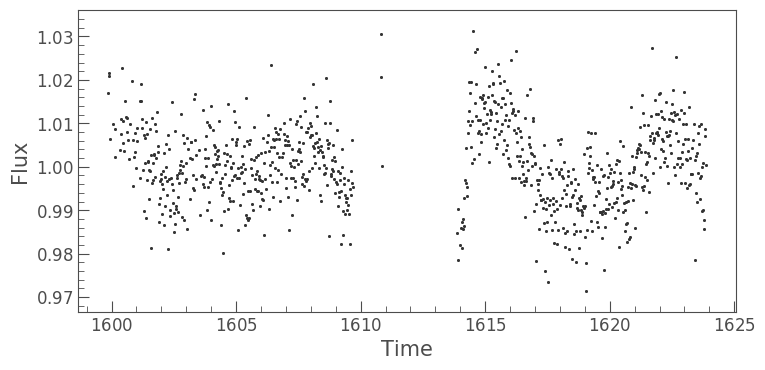

In [272]:
slc_p = single_lc_pca.scatter()

In [219]:
slc_p

In [221]:
tpf_p

In [222]:
rlc_p

In [228]:
acf_p = peakvalfig.gca()
acf_p

In [238]:
gmag = np.str(np.round(ngc2516mems['phot_g_mean_mag'][n],2))
gaia_id, gmag

('5290662249908263296', '16.01')

In [239]:
n

167

In [249]:
figur = plt.figure(figsize=(6,12))
#slc_p = single_lc_pca.scatter()


In [258]:
figur.add_axes(slc_p.boxplot, [.1,.75,.9,.95])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [364]:
ax = ax[0]

In [359]:
ax.plot()

In [282]:
ax.text()
plt.title()

In [305]:
ax1[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c33b42898>,
      dtype=object)

In [335]:
periods[n]

6.560205575843613

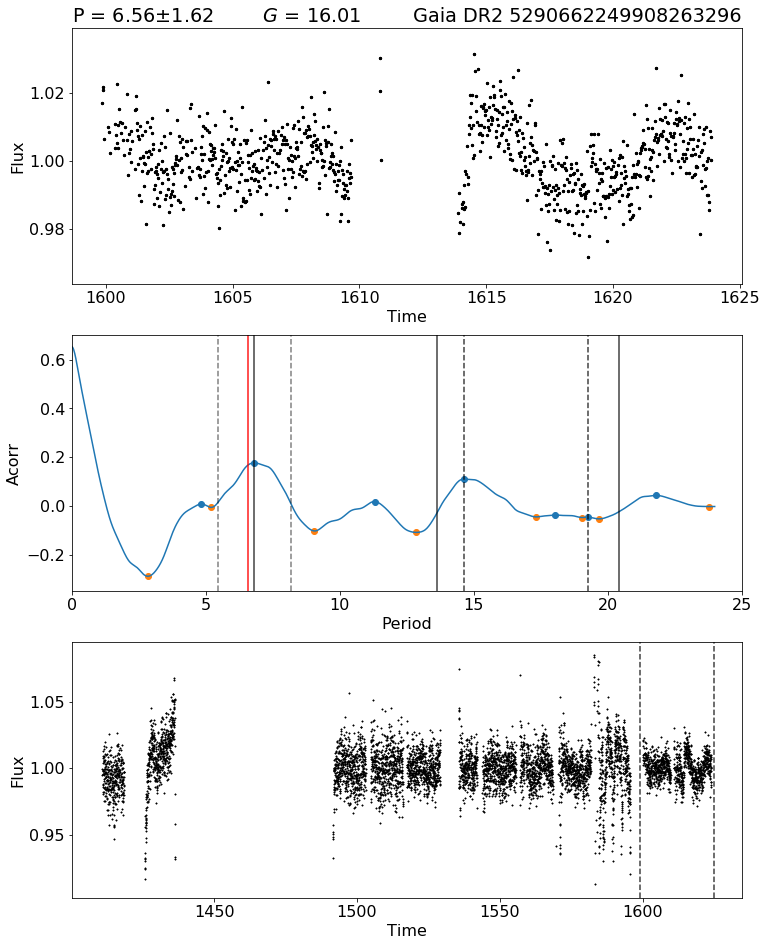

In [397]:
dvr,ax = plt.subplots(3,1,figsize=(12,16))

ax[0].set_title('P = '+np.str(np.round(periods[n],2))+'$\pm$'+np.str(np.round(period_uncs[n],2))+  '        $G$ = '+gmag,loc='left')
ax[0].set_title('Gaia DR2 '+ gaia_id,loc='right')
#ax[0].text(.2,.9,gaia_id,horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
single_lc_pca.scatter(ax=ax[0],c='black',s=5)
lc_pca.scatter(ax=ax[2],s=.5,c='black')
ax[2].axvline(t_start,color='k',ls='dashed',alpha=.75)
ax[2].axvline(t_end,color='k',ls='dashed',alpha=.75)


ax[1].plot(tau, emp_acorr_smooth)
ax[1].scatter(tau[peakinds],emp_acorr_smooth[peakinds])
ax[1].scatter(tau[valinds],emp_acorr_smooth[valinds])
ax[1].axvline(periods[n], color="red", alpha=0.9)
for xx in range(1,5):
    ax[1].axvline(periodmults[1]*xx,color='k',alpha=.75)#,ls='dashed')
ax[1].axvline(periodmults[1]*.8, color="k", alpha=0.5,ls="dashed")
ax[1].axvline(periodmults[1]*1.2, color="k", alpha=0.5,ls="dashed")


#ax[1].axvline(periodmults[1], color="k", alpha=0.5,ls="dashed")
#ax[1].axvline(periodmults[1]*.8, color="k", alpha=0.5,ls="dashed")
#ax[1].axvline(periodmults[1]*1.2, color="k", alpha=0.5,ls="dashed")
#ax[1].axvline(2*periodmults[1], color="k", alpha=0.5)
#ax[1].axvline(3*periodmults[1], color="k", alpha=0.5)
#ax[1].axvline(4*periodmults[1], color="k", alpha=0.5)
#ax[1].axvline(5*periodmults[1], color="k", alpha=0.5)

#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)
ax[1].set_xlim(0,25)
    #plt.xlim(3.,6)
    #plt.xlim(4.2,4.6)
    #plt.ylim(.0,.6)
#ax[1].set_ylabel(r"$\left< k(\tau) \right>$")
#ax[1].set_xlabel(r"$\tau$")
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Acorr')


#plt.axvline(periods[n], color="k",ls="dashed", alpha=0.5)
for xx in range(2,len(periodmults)):
    ax[1].axvline(periodmults[xx], color="k", alpha=0.75,ls='dashed') #ls="dashed",
#plt.axvline(2*periods[n], color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*periods[n], color="k",ls="dashed", alpha=0.5)




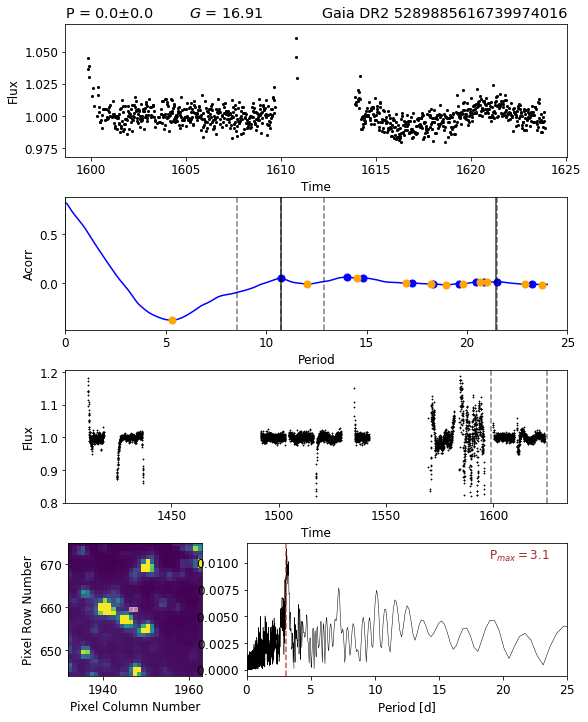

In [504]:
#fig2 = plt.figure(figsize=(15,20))
fig2 = plt.figure(figsize=(9,12))

gs=gridspec.GridSpec(ncols=3, nrows=4,hspace=.3,wspace=.3)
ax1=plt.subplot(gs[0:1,0:])
ax1.set_title('P = '+np.str(np.round(periods[n],2))+'$\pm$'+np.str(np.round(period_uncs[n],2))+  '        $G$ = '+gmag,loc='left')
ax1.set_title('Gaia DR2 '+ gaia_id,loc='right')
#ax[0].text(.2,.9,gaia_id,horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
single_lc_pca.scatter(ax=ax1,c='black',s=3)

ax2=plt.subplot(gs[1:2,0:])
ax2.plot(tau, emp_acorr_smooth,color='blue',zorder=0)
ax2.scatter(tau[peakinds],emp_acorr_smooth[peakinds],color='blue',s=50)
ax2.scatter(tau[valinds],emp_acorr_smooth[valinds],color='orange',s=50)
ax2.axvline(periods[n], color="green", alpha=0.9)
for xx in range(1,5):
    ax2.axvline(periodmults[1]*xx,color='k',alpha=.75)#,ls='dashed')
for yy in range(len(periodmults)):
    ax2.axvline(periodmults[yy],color='k',alpha=.5,ls='dashed')
ax2.axvline(periodmults[1]*.8, color="k", alpha=0.5,ls="dashed")
ax2.axvline(periodmults[1]*1.2, color="k", alpha=0.5,ls="dashed")
ax2.set_xlim(0,25)
ax2.set_xlabel('Period')
ax2.set_ylabel('Acorr')

ax3=plt.subplot(gs[2:3,0:])
lc_pca.scatter(ax=ax3,s=.3,c='black')
ax3.axvline(t_start,color='k',ls='dashed',alpha=.5)
ax3.axvline(t_end,color='k',ls='dashed',alpha=.5)

ax4=plt.subplot(gs[3:4,0:1])
tpf_p=TPF.plot(aperture_mask=apers,ax=ax4,show_colorbar=False)
ax4.set_title('')

ax5=plt.subplot(gs[3:4,1:3])
pdg.plot(view='period',ax=ax5,color='k',ylabel='')
ax5.set_xlim(0,25)
ax5.text(.85,.9,'P$_{max} = $'+np.str(np.round(pdg.period_at_max_power.value,2)),horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes,color='brown')
ax5.axvline(pdg.period_at_max_power.value, color="brown", alpha=0.75,ls="dashed")

fig2.savefig('/Users/bhealy/Desktop/Test.pdf',bbox_inches='tight')
#plt.subplot(gs[1:2])

In [444]:
np.str(np.round(pdg.period_at_max_power.value,2))

'8.59'

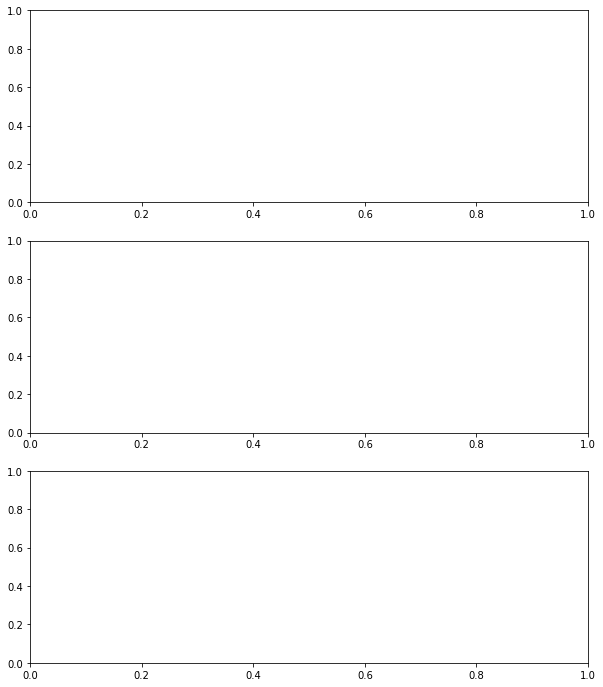

In [270]:
sbpl[0]

In [156]:
middletime = (lc.time[0] + lc[-1])/2
middletime

In [158]:
lc.time[0]

1325.322657844423

In [148]:
period_uncs[periods>0]#, period_uncs

array([4.80499040e-01, 6.04051729e+00, 8.83847496e-03, 2.91226472e-01,
       8.83839668e-03, 2.74566542e-01, 3.88969403e-01, 3.23584905e-02,
       0.00000000e+00, 3.20327487e-01, 0.00000000e+00, 2.12121101e-01,
       8.83852289e-03, 3.22615749e+00, 3.23584325e-02, 4.57618155e-02,
       7.09297224e+00, 0.00000000e+00, 4.20657562e-01, 6.61253816e+00,
       6.86427022e-01, 1.50254084e-01, 2.05924864e-01, 2.28805389e-02,
       7.44233283e-01, 1.58521086e-01, 5.44556925e+00, 3.55941042e-01,
       2.28809177e-02, 3.43462375e-01, 4.57618568e-02, 8.83839819e-03,
       4.68442520e-01, 8.83852126e-03, 0.00000000e+00, 3.23582683e-02,
       2.28809125e-02, 1.06060780e-01, 0.00000000e+00, 3.77529022e+00,
       1.67029430e+00, 9.24714104e-02, 0.00000000e+00, 1.14404640e-01,
       0.00000000e+00, 6.40660819e-01, 6.47170246e-02, 5.01087949e+00,
       8.83839502e-03, 4.57618525e-02, 9.15229518e-02, 1.15089043e+01,
       3.56936120e+00, 6.79522955e-01, 2.28809153e-02, 5.28412437e-02,
      

In [92]:
emp_acorr_smooth[peakinds]

array([ 3.68867616e-02,  2.44354718e-01, -6.78860383e-02,  1.89355008e-01,
       -2.68754664e-02,  1.69795480e-01, -7.20882817e-03,  1.45271152e-01,
        4.72382581e-02,  7.59975327e-02,  7.95087339e-02,  7.21237681e-02,
        8.65542596e-02,  4.89635933e-02,  1.05496928e-01,  1.67699805e-02,
        9.53525871e-02, -9.24721732e-05,  6.58679149e-02,  2.67395015e-03,
        5.65099772e-02,  1.43311851e-03,  3.76064853e-02,  1.29738460e-03,
        1.40197443e-02,  5.01969466e-03])

In [169]:
S = eleanor.multi_sectors('all',gaia=gaia_ids[166], tc=True)

Found star in Sector(s) 1 4 7 8 9 10 10 11


In [192]:
tgd = eleanor.TargetData(S[6],do_pca=True)

/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:567: RuntimeWarning: invalid value encountered in multiply
  all_lc_err[a] = np.sqrt( np.nansum(self.tpf_err**2 * self.all_apertures[a], axis=(1,2)))
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:588: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_pc_sub[a] = self.corrected_flux(flux=all_raw_lc_pc_sub[a]/np.nanmedian(all_raw_lc_pc_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/eleanor/targetdata.py:590: RuntimeWarning: invalid value encountered in true_divide
  all_corr_lc_tpf_sub[a]= self.corrected_flux(flux=all_raw_lc_tpf_sub[a]/np.nanmedian(all_raw_lc_tpf_sub[a]),
/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [202]:
tempdata = eleanor.TargetData(S[7], height=13, width=13, bkg_size=31, do_psf=False, do_pca=True, crowded_field=True)

In [187]:
np.sum(np.isnan(tgd.pca_flux))

0

In [214]:
S[6].position_on_chip

array([1.01310766e+03, 6.38698547e-01])

In [39]:
periods[0:20]

array([6.94633378, 4.47776596, 7.32200663, 6.54782266, 7.32616865,
       7.19712891, 3.96484623, 4.81259817, 7.34281738, 3.25720702,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [198]:
#for i in range(len(S)):
#    print(S[i].)

0
Found star in Sector(s) 1 4 7 8 10 11


1
Found star in Sector(s) 1 4 7 8 10 11


2
Found star in Sector(s) 1 4 7 8 10 11


3
Found star in Sector(s) 1 4 7 8 10 11
Inflating...


4
Found star in Sector(s) 1 4 7 8 10 11


5
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


10
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


11
Found star in Sector(s) 1 4 7 8 9 10 11
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  9...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Target Acquired
Cadences Calculated
Quality Flags Assured
CBVs Made
Success! Sector  9 now available.


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


12
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


13
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


14
Found star in Sector(s) 1 4 7 8 10 11


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15
Found star in Sector(s) 1 4 7 8 10 11
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...


/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


16
Found star in Sector(s) 1 4 7 8 10 11


KeyboardInterrupt: 

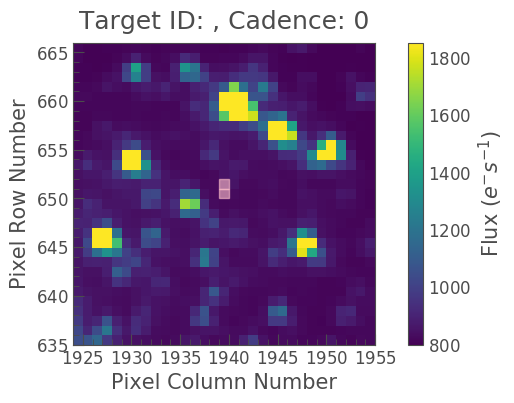

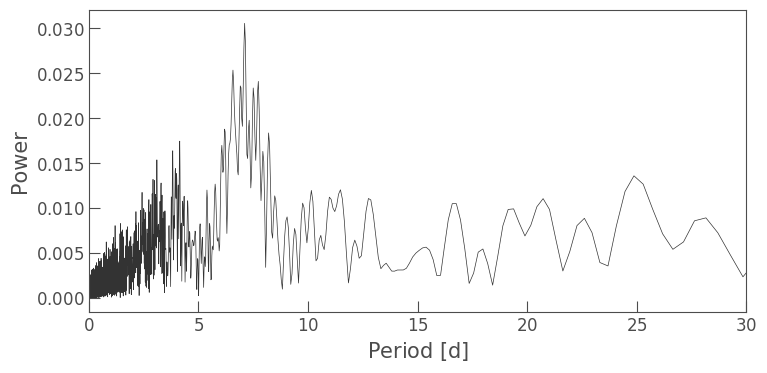

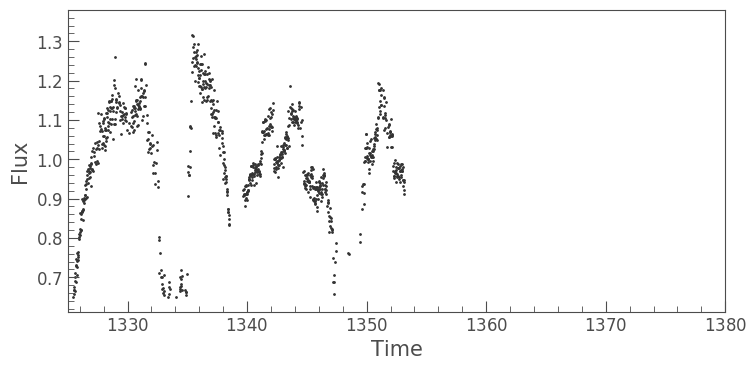

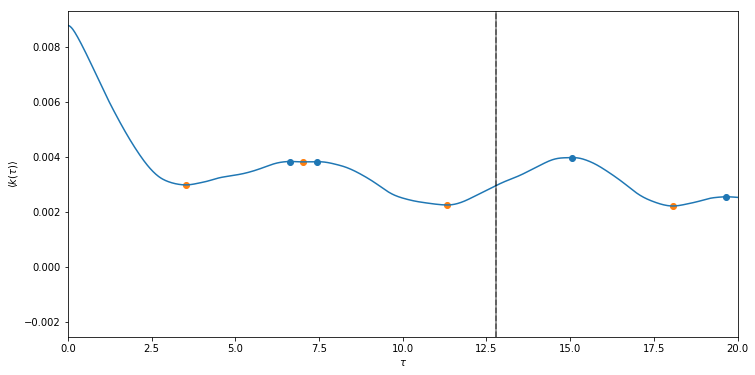

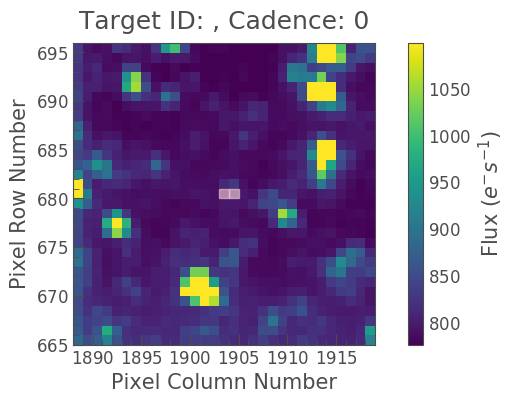

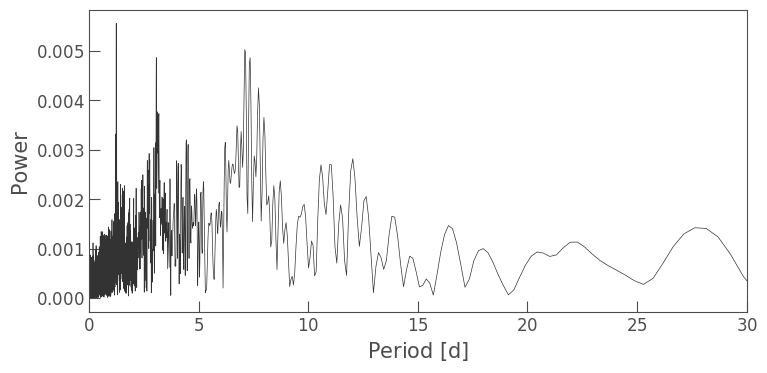

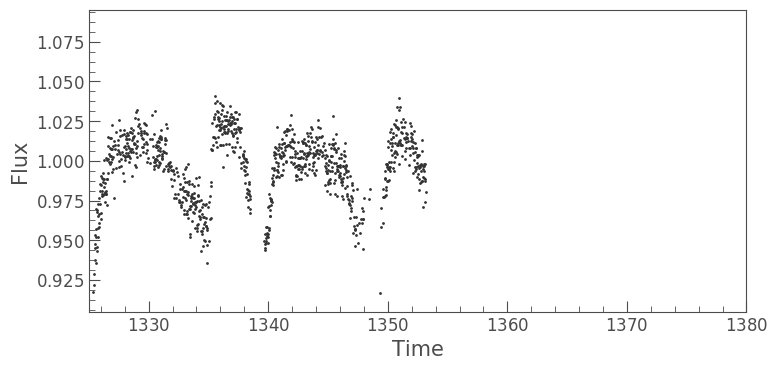

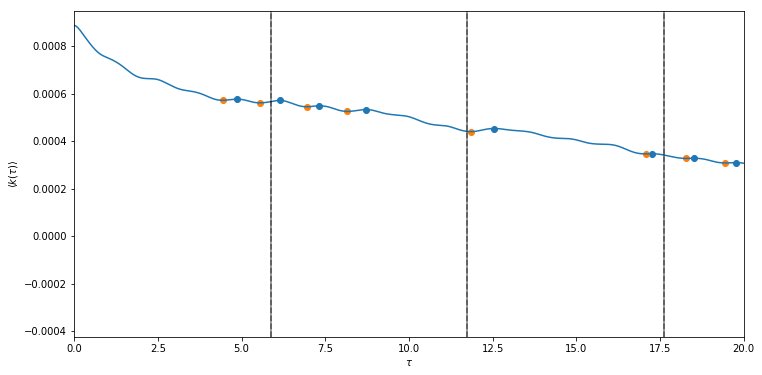

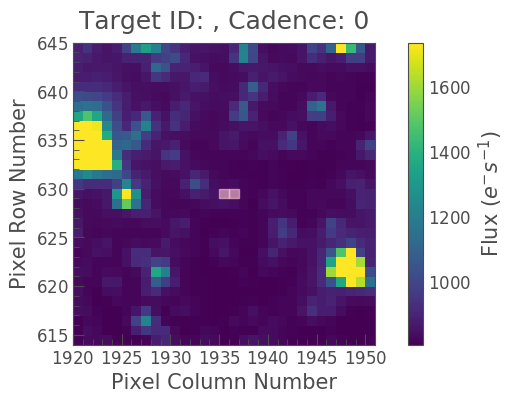

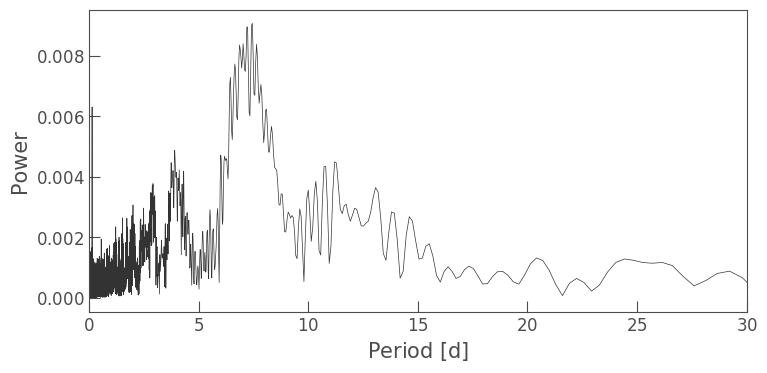

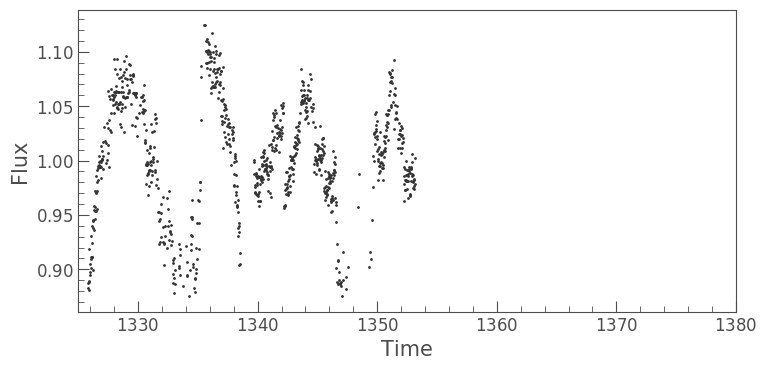

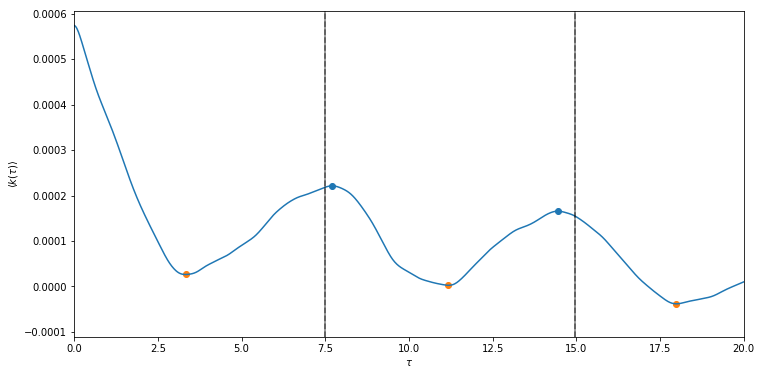

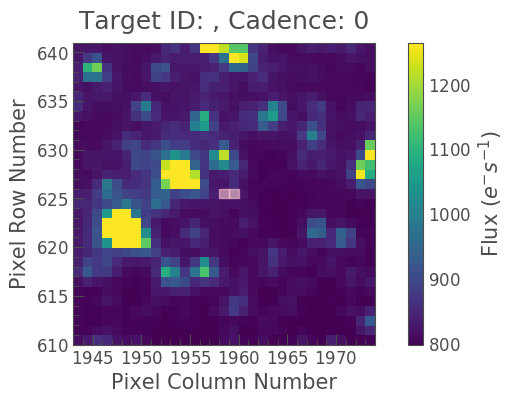

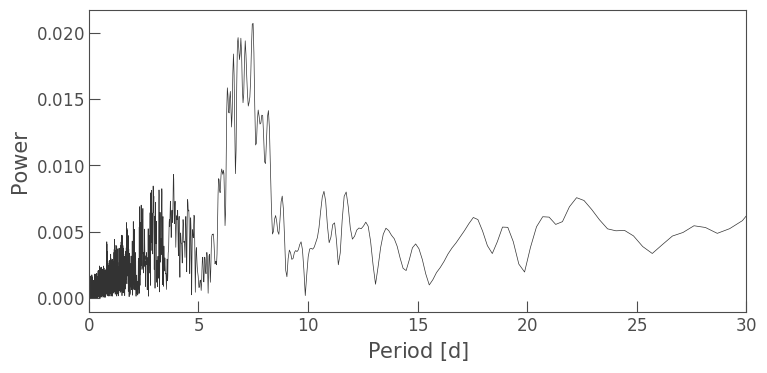

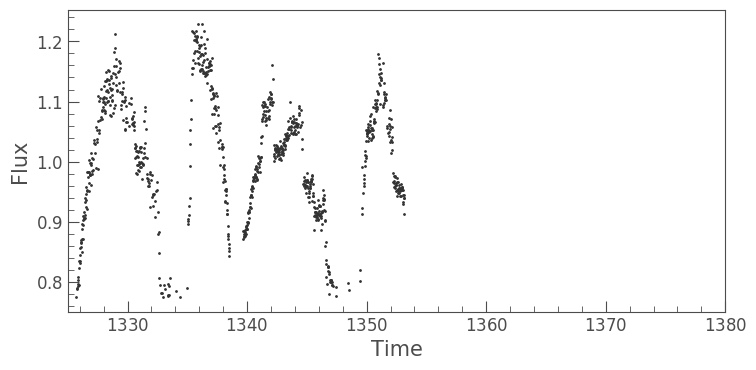

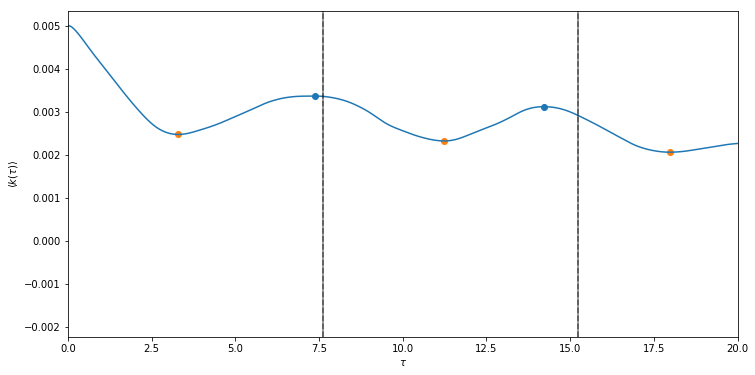

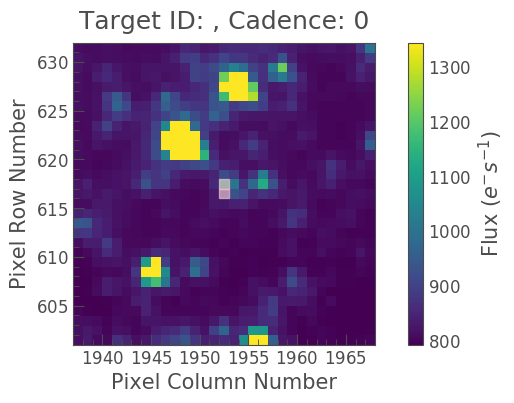

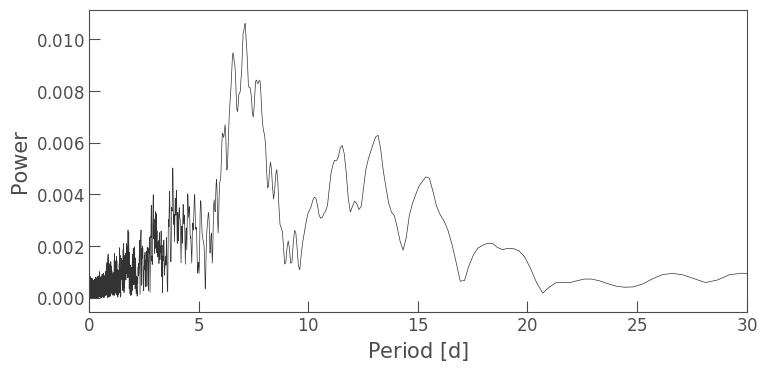

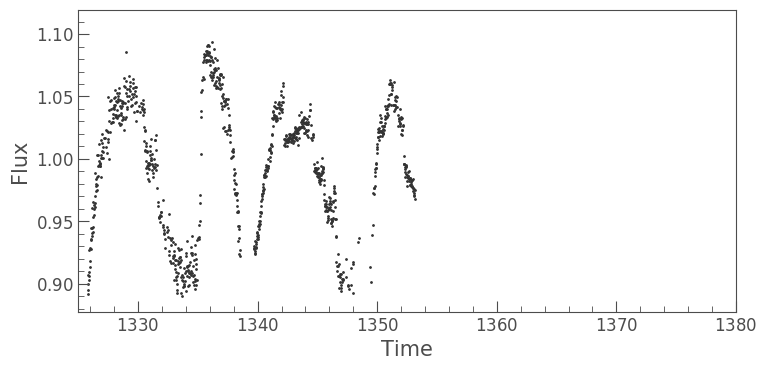

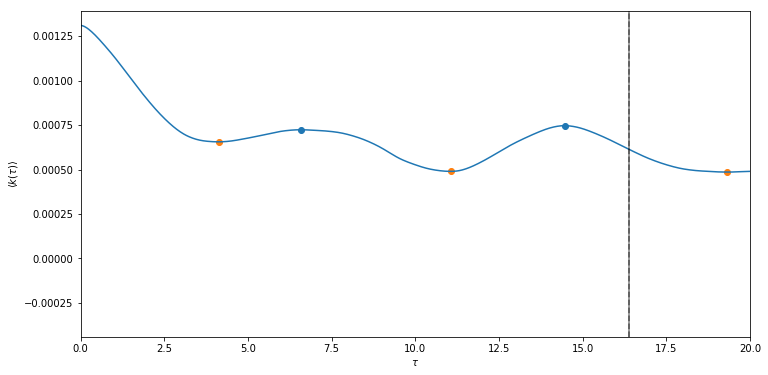

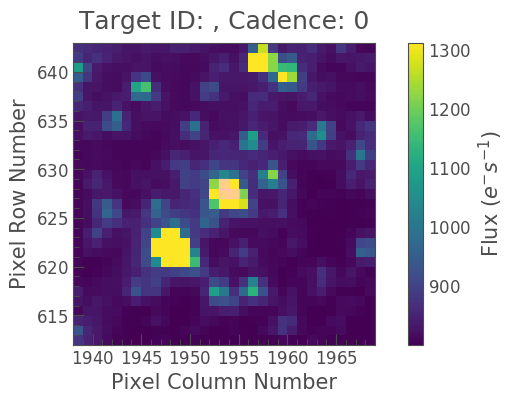

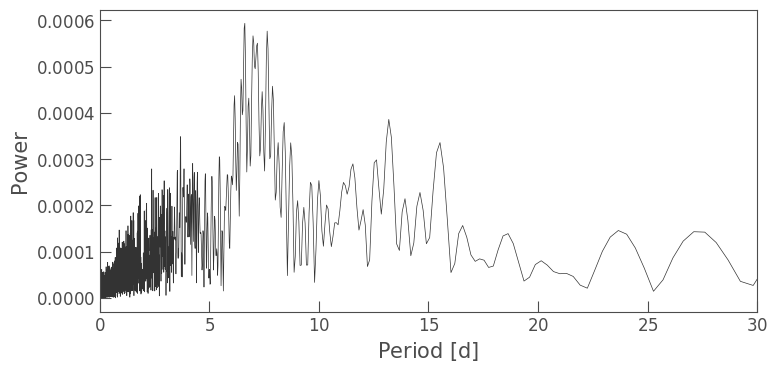

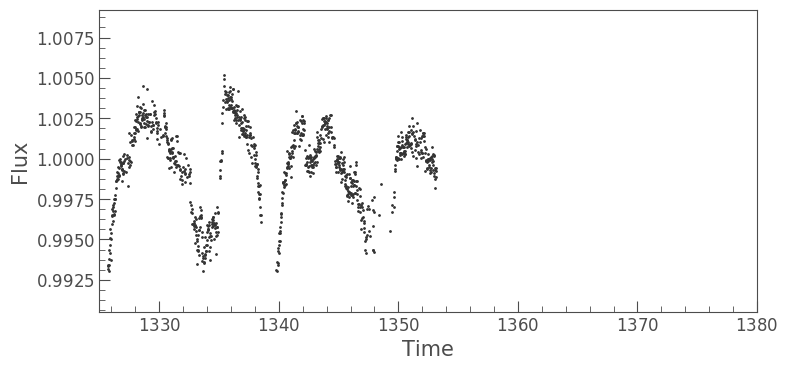

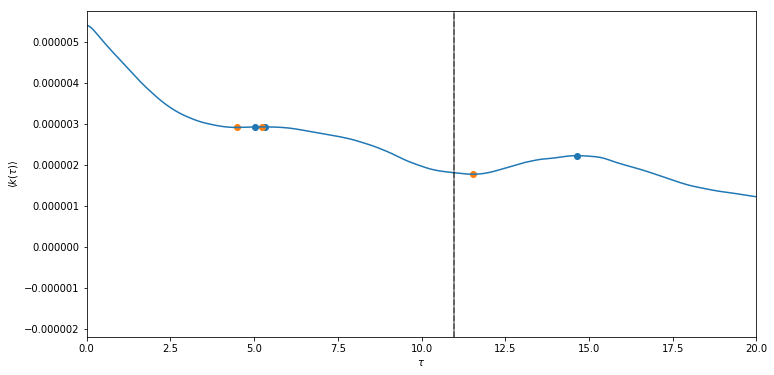

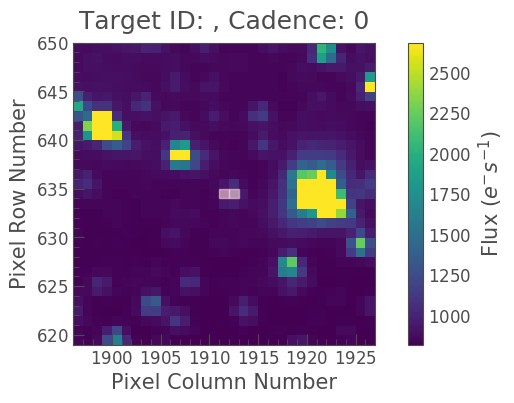

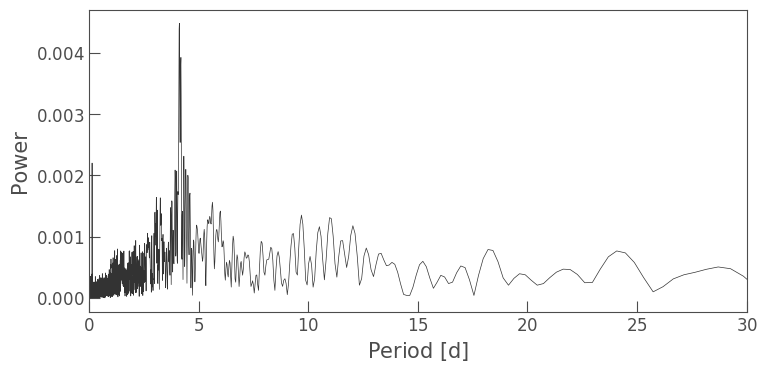

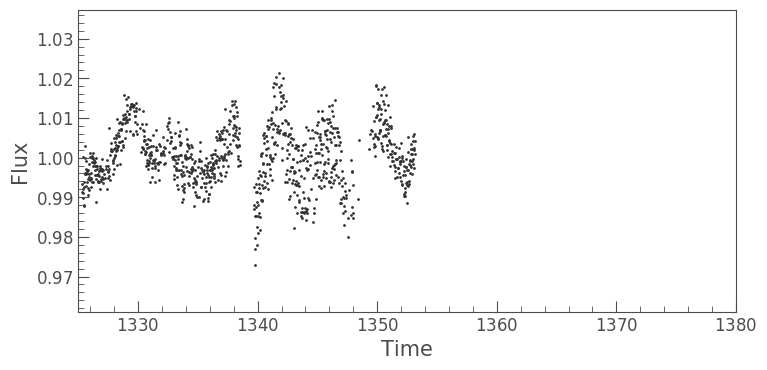

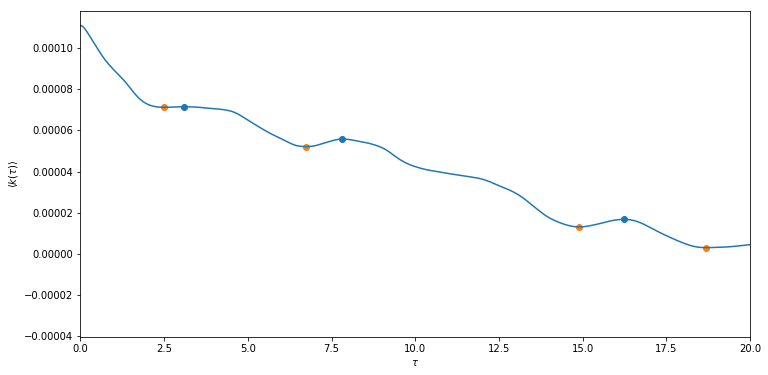

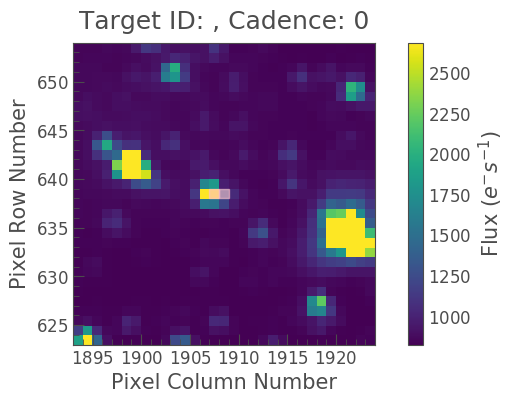

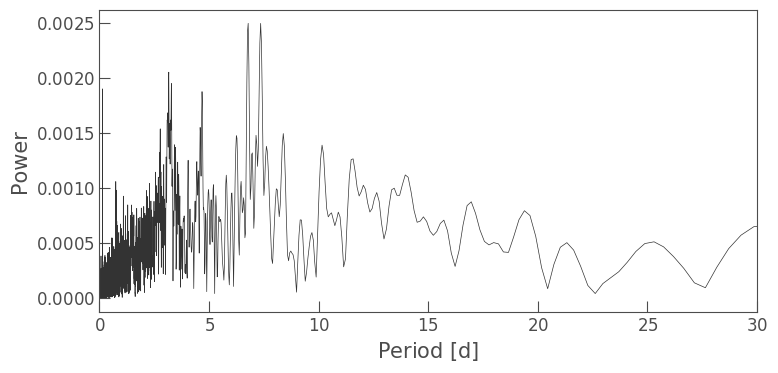

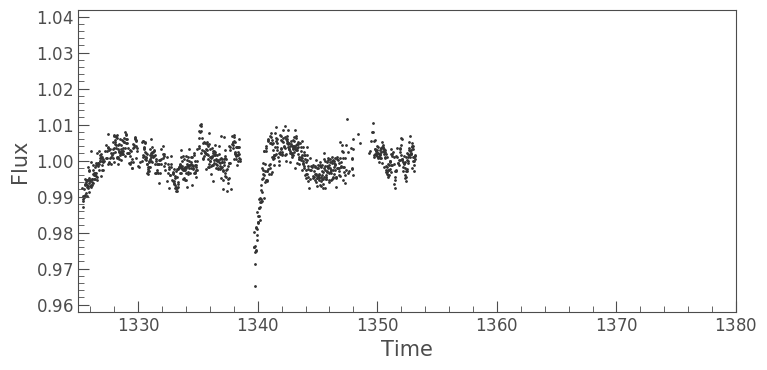

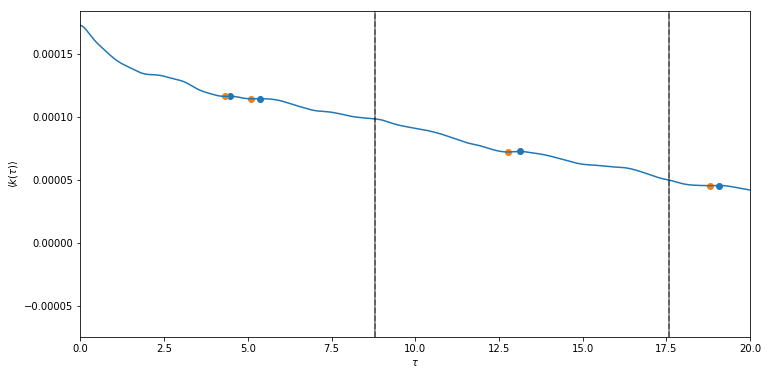

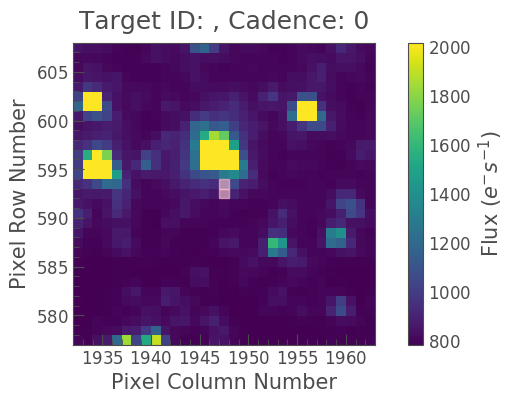

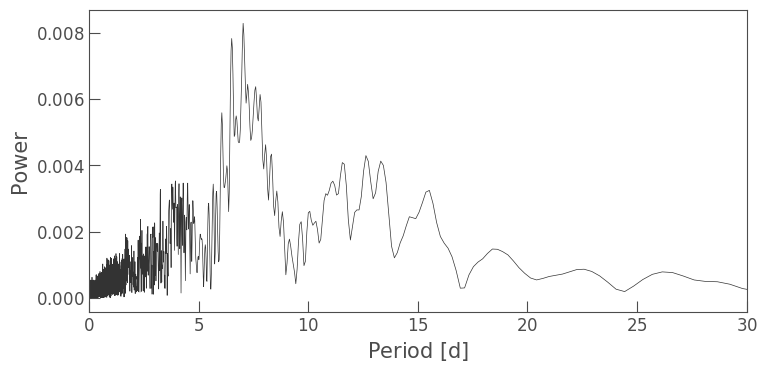

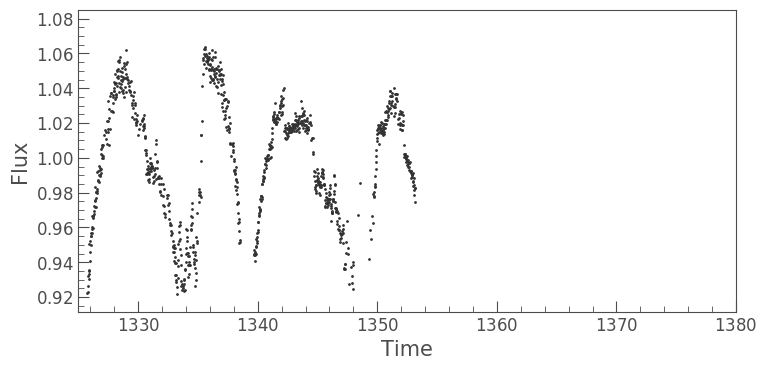

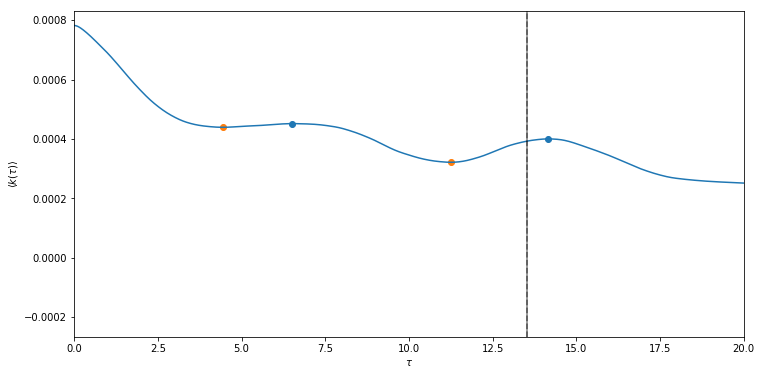

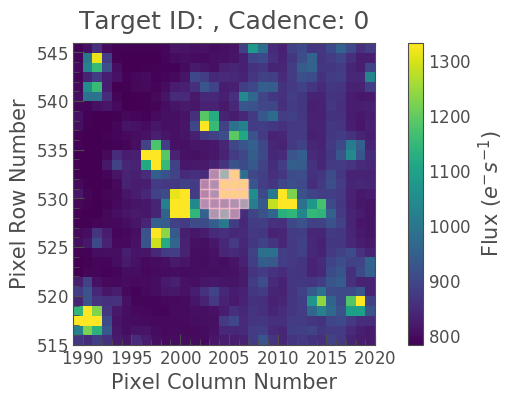

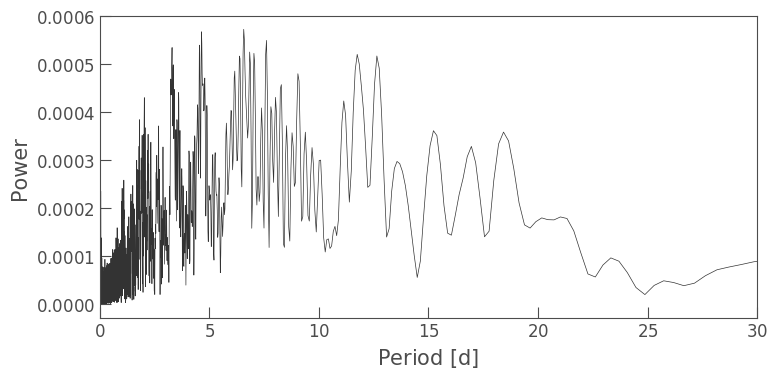

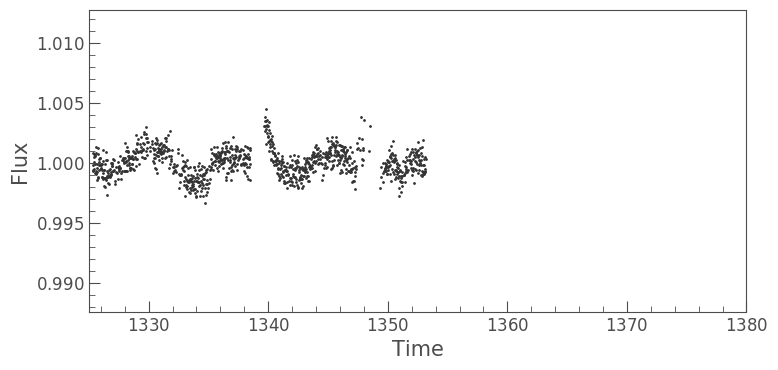

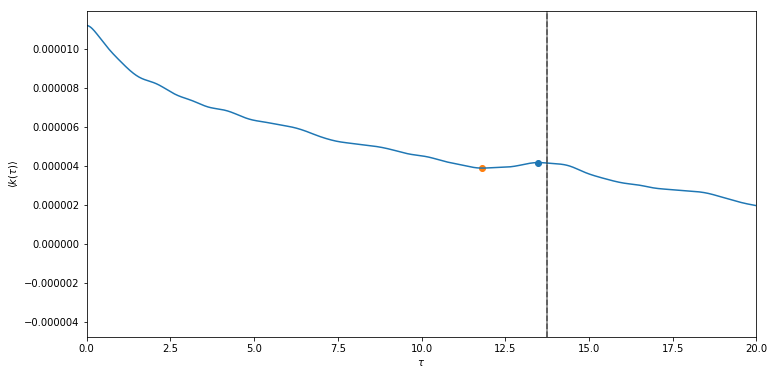

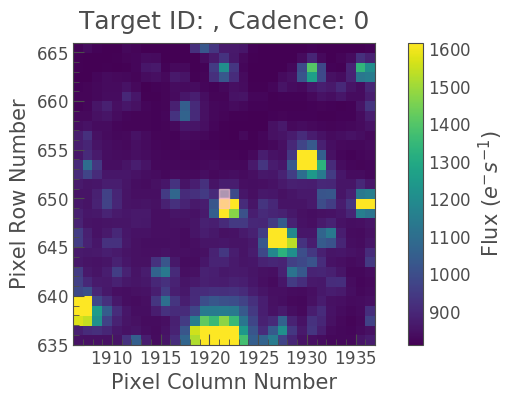

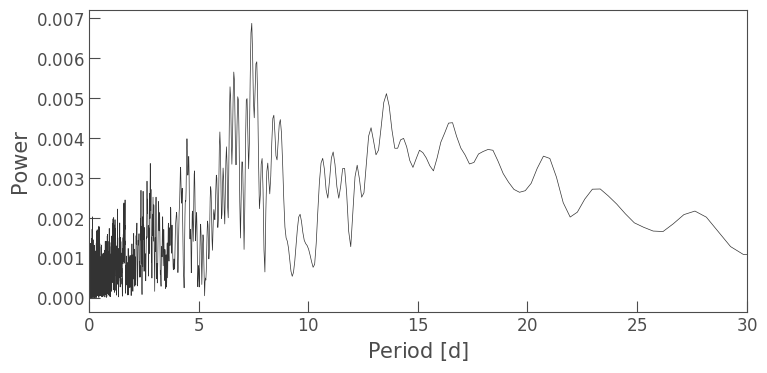

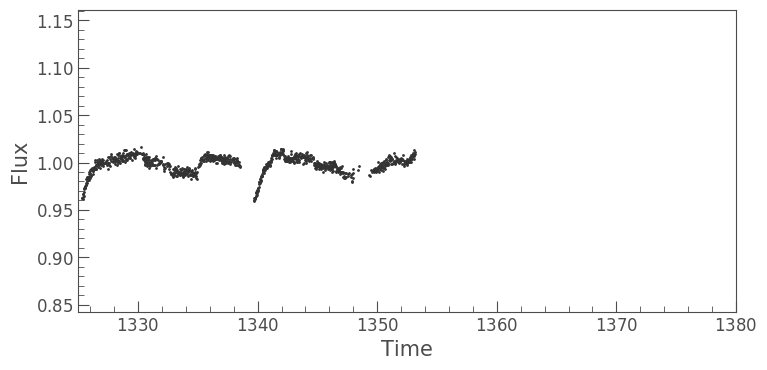

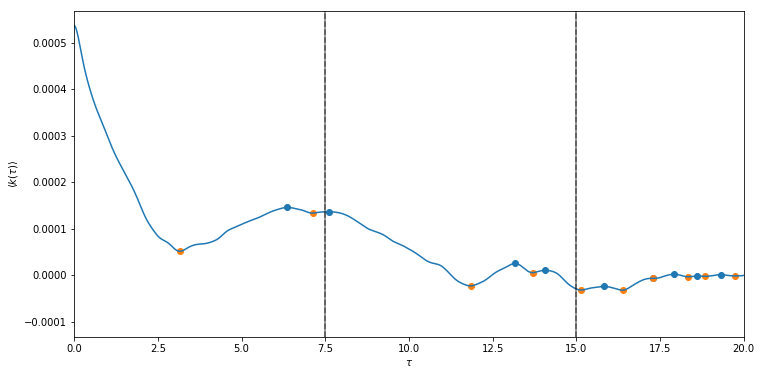

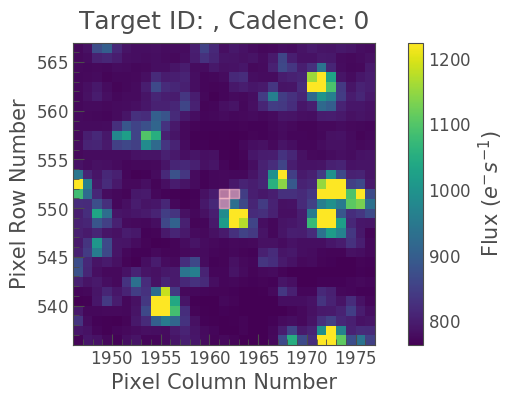

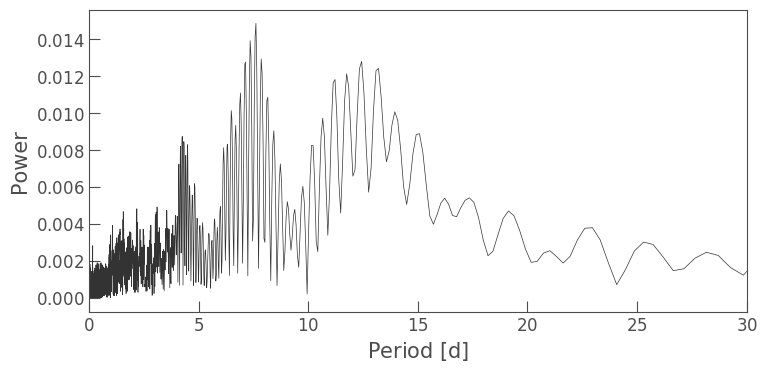

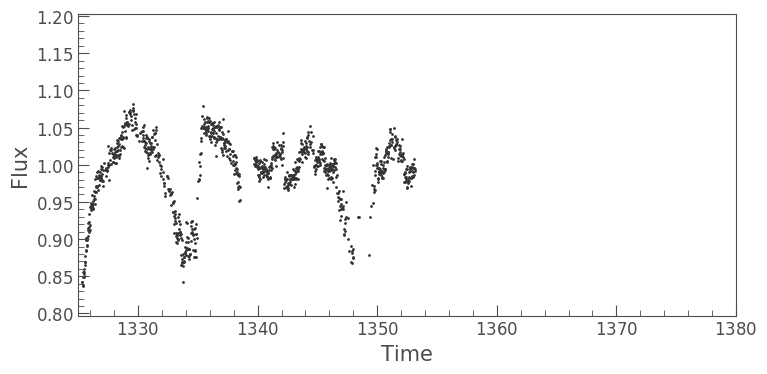

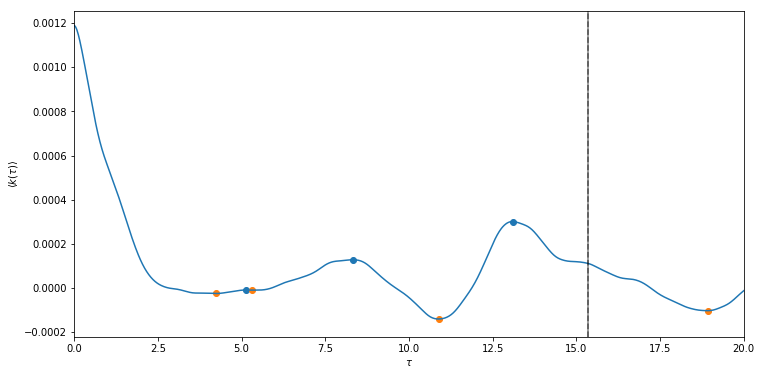

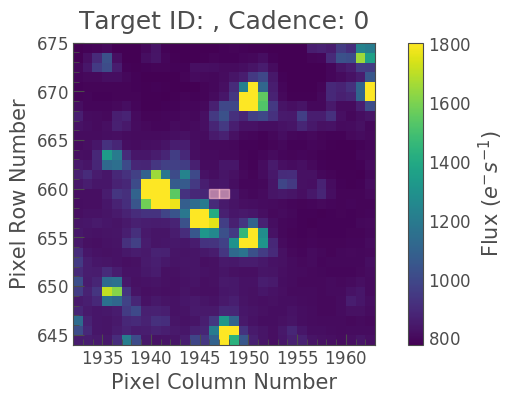

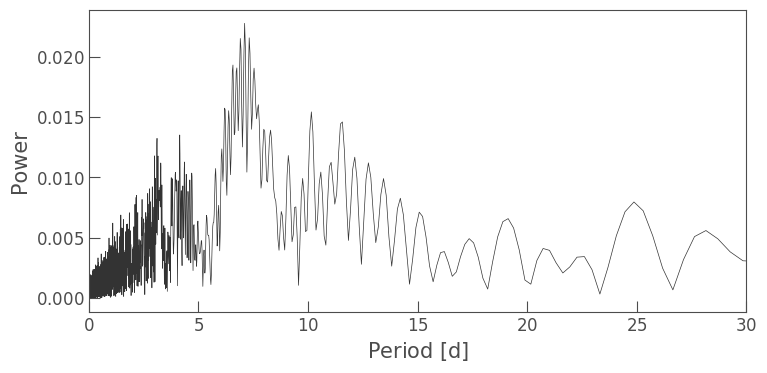

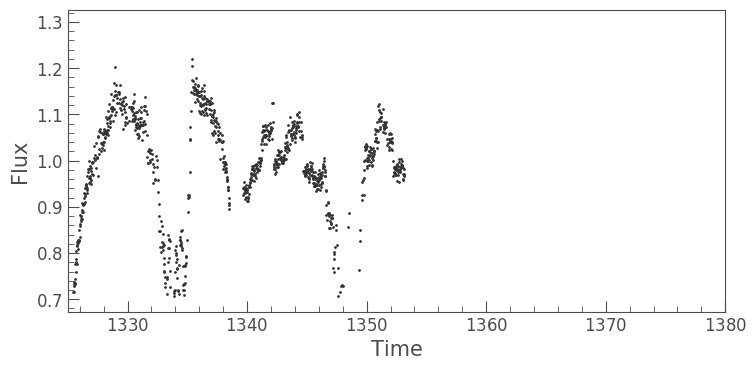

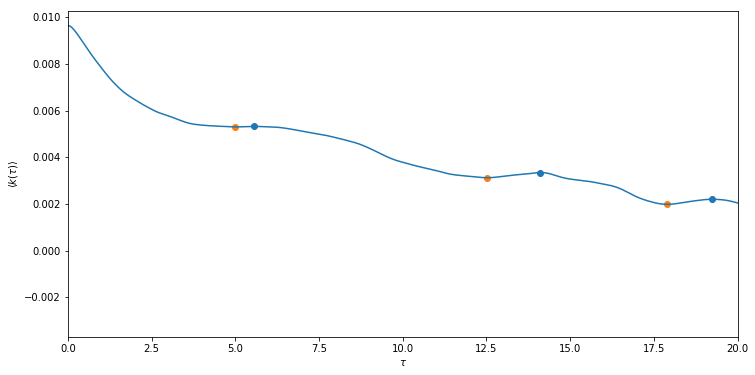

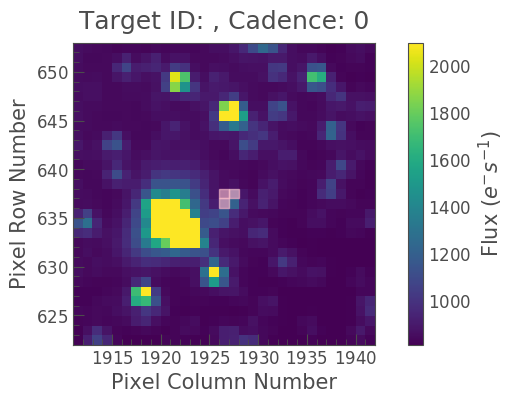

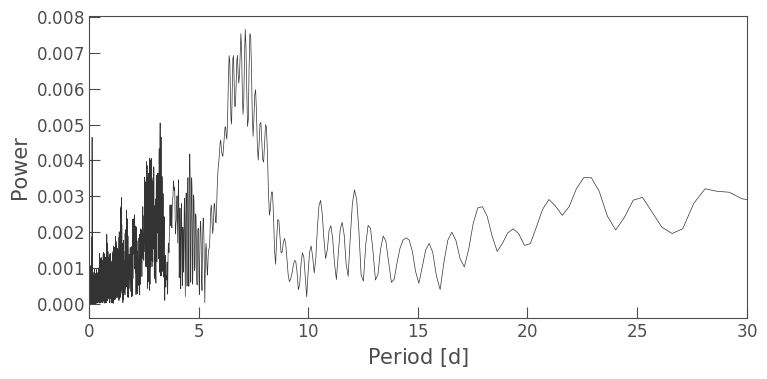

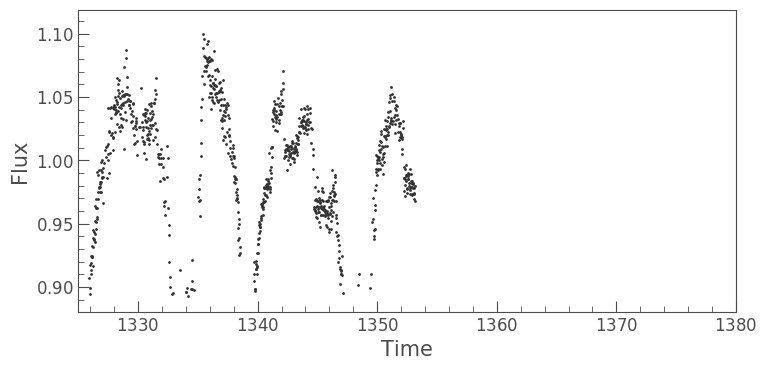

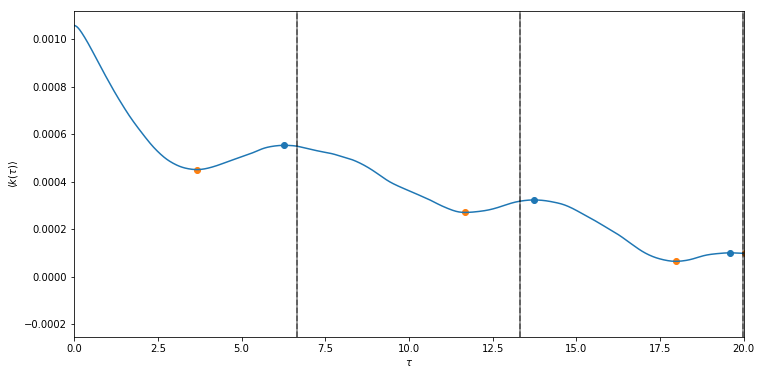

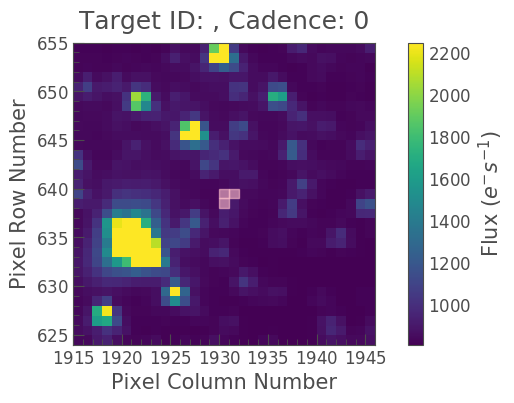

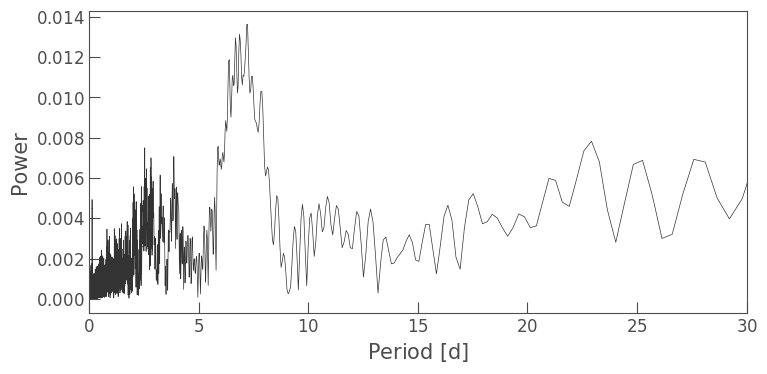

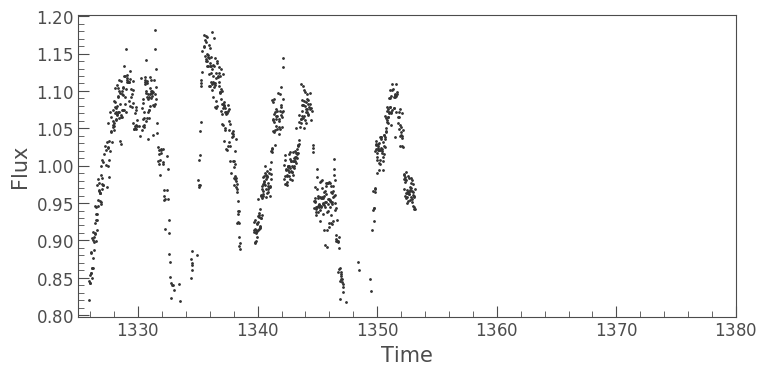

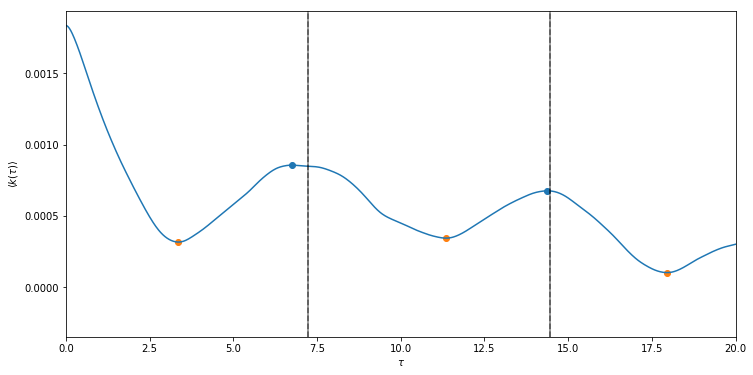

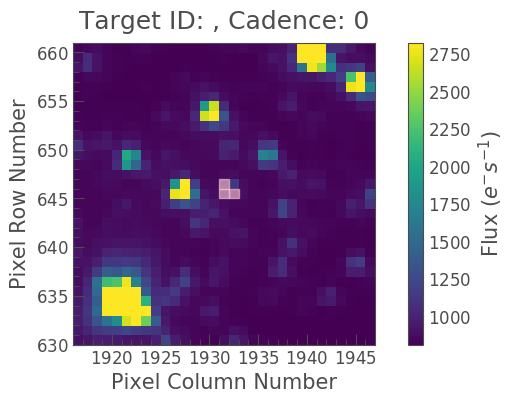

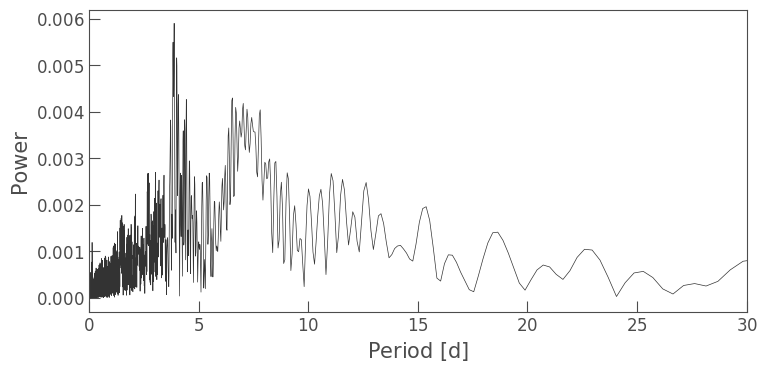

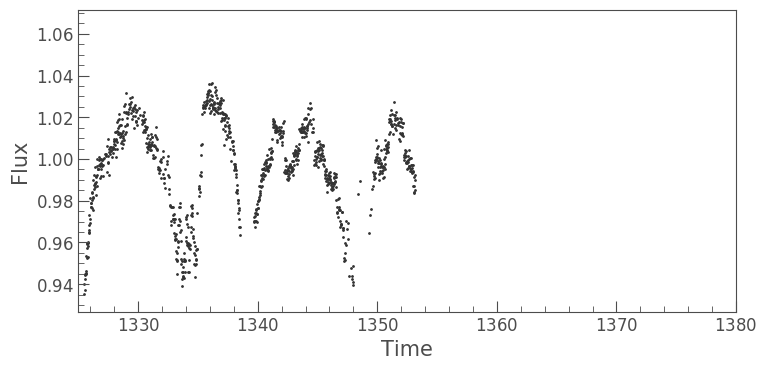

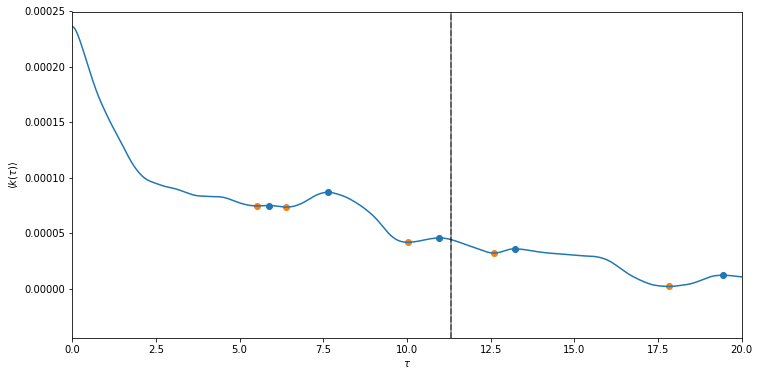

In [8]:
#periods = np.zeros(len(toi_unique))
periods = np.zeros(len(ngc2516mems))
period_uncs = np.copy(periods)

for n in range(len(ngc2516mems)):
#for n in range(0,2):
    print(n)
    #toi = toi_unique[n]
    gaia_id = np.str(ngc2516mems['source_id'][n])
    #planets = toi_dict[toi_unique[n]]
    
    #lc, TPF, apers = get_toi_lc(n,ticids)
    lc, TPF, apers = get_toi_lc(n,ngc2516mems)
    
    tpf_p=TPF.plot(aperture_mask=apers)
    tpf_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/TPFs/'+np.str(n)+'_'+gaia_id+'_tpf.pdf',overwrite=True)
    cleanlc = lc.remove_outliers()
    repl_lc = cleanlc
    
    periods[n], period_uncs[n], tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(repl_lc)
    #periods[n], period_uncs[n] = get_acf_period(repl_lc)

    #for i in range(len(planets)):
    #    fulltoi = toi_unique[n] +'.'+ toi_dict[toi_unique[n]][i]
    #    xmatchindx = np.where(np.float(fulltoi) == Xmatch['TOI'])[0][0]
        #tpf_p=TPF.plot(aperture_mask=apers)
    #    repl_lc = replace_transits(Xmatch,xmatchindx,repl_lc)
    pdg = repl_lc.to_periodogram()
    pdg_p=pdg.plot(view='period')
    plt.xlim(0,30)
    pdg_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodogram_plots/'+np.str(n)+'_'+gaia_id+'_pdgplot.pdf',overwrite=True)
    #periods[n] = pdg.period_at_max_power.value
    lctbl = repl_lc.to_table()
    lctbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/'+np.str(n)+'_'+gaia_id+'_lc.txt',format='ascii',overwrite=True)

    rlc_p = repl_lc.scatter()
    rlc_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/LC_all_plots/'+np.str(n)+'_'+gaia_id+'_lc_all.pdf',overwrite=True)

    plt.xlim(1325,1380)
    rlc_p.figure.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/LC_segments/'+np.str(n)+'_'+gaia_id+'_lcseg.pdf',overwrite=True)

    #pdg = repl_lc.to_periodogram()
    pdgtbl = pdg.to_table()
    pdgtbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Periodograms/'+np.str(n)+'_'+gaia_id+'_pdg.txt',format='ascii',overwrite=True)
    
    peakvalfig = plt.figure(figsize=(12,6))
    plt.plot(tau, emp_acorr_smooth)
    plt.scatter(tau[peakinds],emp_acorr_smooth[peakinds])
    plt.scatter(tau[valinds],emp_acorr_smooth[valinds])


    plt.axvline(periods[n], color="k", alpha=0.5)
    plt.axvline(2*periods[n], color="k", alpha=0.5)
    plt.axvline(3*periods[n], color="k", alpha=0.5)

    #plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
    #plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
    #plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

    plt.axvline(periods[n], color="k",ls="dashed", alpha=0.5)
    plt.axvline(2*periods[n], color="k",ls="dashed", alpha=0.5)
    plt.axvline(3*periods[n], color="k",ls="dashed", alpha=0.5)

    #plt.xlim(0, 20)
    #plt.xlim(240,280)
    plt.xlim(0,20)
    #plt.xlim(3.,6)
    #plt.xlim(4.2,4.6)
    #plt.ylim(.0,.6)
    plt.ylabel(r"$\left< k(\tau) \right>$")
    plt.xlabel(r"$\tau$")
    peakvalfig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/ACFfigs/'+np.str(n)+'_'+gaia_id+'_acf.pdf',overwrite=True)
    plt.close('all')

In [ ]:
5289873315953700608

In [13]:
lc,tpf,apers=get_toi_lc(6,ngc2516mems)

Found star in Sector(s) 1 4 7 8 10 11


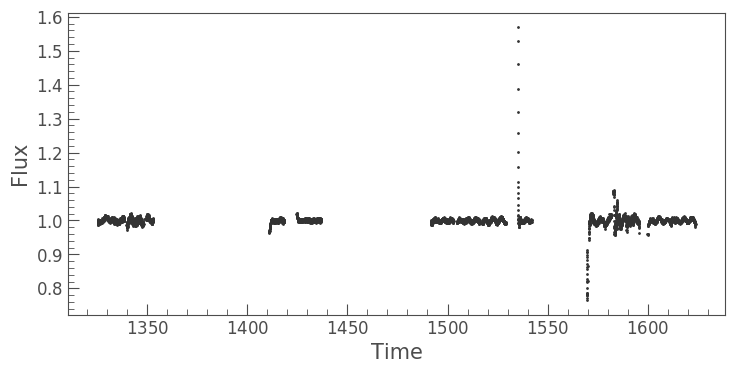

In [14]:
lc.scatter()

In [15]:
cleanlc = lc.remove_outliers()

In [18]:
periodz, period_uncz, tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(cleanlc)

In [19]:
periodz

4.772339299530259

In [20]:
maxheight

0.018836663206471177

In [159]:
#t = lc[2500:3500].time
#y = (lc[2500:3500].flux - 1) * 1e3
#yerr = (lc[2500:3500].flux_err) * 1e3

t = lc.time
y = (lc.flux - 1) * 1e3
yerr = (lc.flux_err) * 1e3

In [160]:
delta_t = np.median(np.diff(t))
new_t = np.arange(t.min(), t.max(), delta_t)
new_f = np.zeros(len(new_t))

In [161]:
for i in range(len(lc.time)):
    t_diffs = np.abs(new_t - t[i])
    minindx = np.argmin(t_diffs)
    new_f[minindx] = y[i]



(1490, 1540)

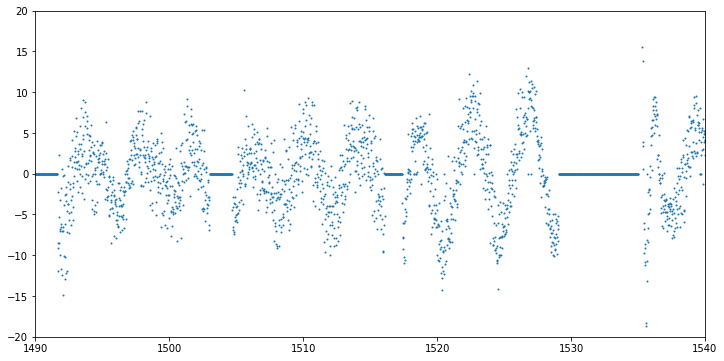

In [167]:
plt.figure(figsize=(12,6))
plt.scatter(new_t,new_f,s=1)
plt.ylim(-20,20)
plt.xlim(1490,1540)

In [131]:
y_interp = np.interp(np.arange(t.min(), t.max(), delta_t),
                     t, y)
test = emcee.autocorr.function_1d(y_interp)# * np.var(y_interp)

In [132]:
np.max(test)

1.0

In [47]:
ngc2516mems[6]

<Row index=6>
        ra                 dec              source_id              l                   b               parallax         parallax_error           pmra            pmra_error           pmdec            pmdec_error      ra_dec_corr ra_parallax_corr ra_pmra_corr ra_pmdec_corr dec_parallax_corr dec_pmra_corr dec_pmdec_corr parallax_pmra_corr parallax_pmdec_corr pmra_pmdec_corr phot_g_n_obs phot_g_mean_mag   bp_rp         proba       cluster 
     float64             float64              int64             float64             float64            float64             float64             float64            float64            float64             float64          float64       float64        float64       float64         float64         float64       float64          float64             float64           float64        int64         float64      float64       float64        str8  
------------------ ------------------- ------------------- ------------------ ------------------- ------------------ -------------------- ----------------- ------------------- ------------------ -------------------- ----------- ---------------- ------------ ------------- ----------------- ------------- -------------- ------------------ ------------------- --------------- ------------ --------------- --------- ----------------- --------
119.72947963777617 -61.628932899579574 5289873315953700608 274.67272067344726 -16.169958821619506 2.4200738869542495 0.013478868681209876 -4.89693563360871 0.03008258625154246 11.265338402090945 0.026244924399369204  0.08155191      -0.06485414  -0.23383428    0.06951194        0.23910844    0.10942956    -0.16948931         0.12322369         -0.12942874      0.11724744          411       13.316041 1.0264168 0.800000011920929 NGC_2516

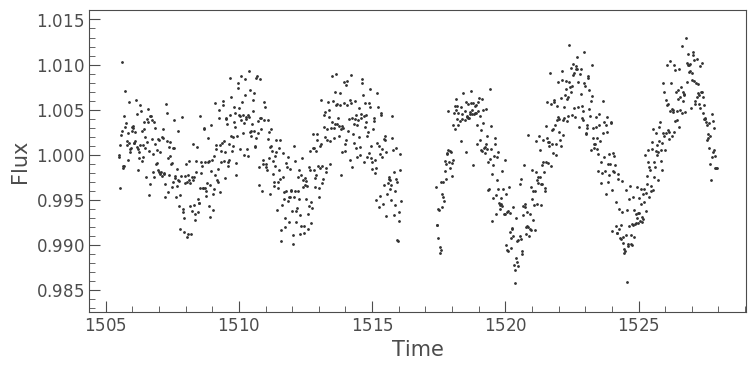

In [24]:
lc[2500:3500].scatter()
#plt.ylim(.99,1.01)
#plt.xlim(1490,1540)

In [33]:
period, period_unc, tau, emp_acorr_smooth, peakinds, valinds, maxheight = get_acf_period(lc[2500:3500])

In [34]:
maxheight

1.0446488602366342

Text(0.5,0,'$\\tau$')

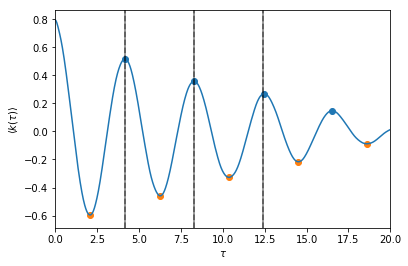

In [35]:
#tau = np.arange(len(emp_acorr_smooth)) * delta_t
plt.plot(tau, emp_acorr_smooth)
plt.scatter(tau[peakinds],emp_acorr_smooth[peakinds])
plt.scatter(tau[valinds],emp_acorr_smooth[valinds])


plt.axvline(period, color="k", alpha=0.5)
plt.axvline(2*period, color="k", alpha=0.5)
plt.axvline(3*period, color="k", alpha=0.5)

#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

plt.axvline(period, color="k",ls="dashed", alpha=0.5)
plt.axvline(2*period, color="k",ls="dashed", alpha=0.5)
plt.axvline(3*period, color="k",ls="dashed", alpha=0.5)

#plt.xlim(0, 20)
#plt.xlim(240,280)
plt.xlim(0,20)
#plt.xlim(3.,6)
#plt.xlim(4.2,4.6)
#plt.ylim(.0,.6)
plt.ylabel(r"$\left< k(\tau) \right>$")
plt.xlabel(r"$\tau$")

Text(0.5,0,'$\\tau$')

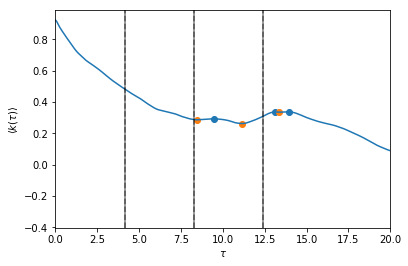

In [177]:
#tau = np.arange(len(emp_acorr_smooth)) * delta_t
plt.plot(tau, emp_acorr_smooth)
plt.scatter(tau[peakinds],emp_acorr_smooth[peakinds])
plt.scatter(tau[valinds],emp_acorr_smooth[valinds])


plt.axvline(period, color="k", alpha=0.5)
plt.axvline(2*period, color="k", alpha=0.5)
plt.axvline(3*period, color="k", alpha=0.5)

#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

plt.axvline(period, color="k",ls="dashed", alpha=0.5)
plt.axvline(2*period, color="k",ls="dashed", alpha=0.5)
plt.axvline(3*period, color="k",ls="dashed", alpha=0.5)

#plt.xlim(0, 20)
#plt.xlim(240,280)
plt.xlim(0,20)
#plt.xlim(3.,6)
#plt.xlim(4.2,4.6)
#plt.ylim(.0,.6)
plt.ylabel(r"$\left< k(\tau) \right>$")
plt.xlabel(r"$\tau$")

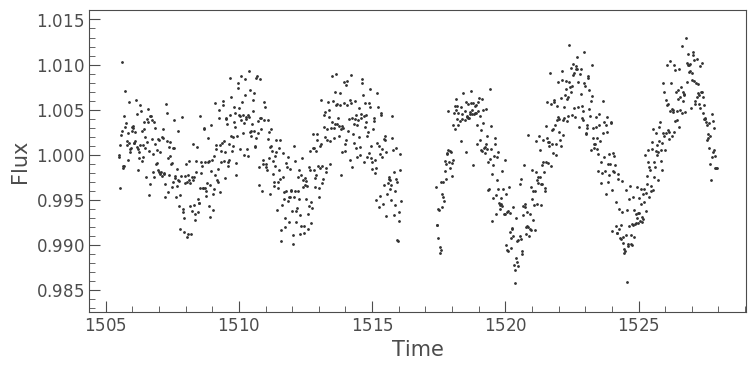

In [31]:
lc[2500:3500].scatter()

In [394]:
ngc2516mems[0:17]

<Table length=17>
        ra                 dec         ...        proba        cluster 
     float64             float64       ...       float64         str8  
------------------ ------------------- ... ------------------- --------
119.64282668758783 -61.452193604045654 ...   0.699999988079071 NGC_2516
119.19350058863937  -61.58236060631561 ... 0.30000001192092896 NGC_2516
119.86335546049123 -61.516366132126194 ...   0.800000011920929 NGC_2516
119.98137591874814   -61.4038632769621 ...   0.800000011920929 NGC_2516
120.05924491233837 -61.452871822988726 ...                 0.5 NGC_2516
119.94306775020152 -61.428719187448785 ... 0.20000000298023224 NGC_2516
119.72947963777617 -61.628932899579574 ...   0.800000011920929 NGC_2516
119.67760602546025 -61.638058241591146 ...   0.800000011920929 NGC_2516
120.29485215570632  -61.52424220218858 ...                 0.5 NGC_2516
121.13929660975464  -61.34479131354677 ...   0.800000011920929 NGC_2516
119.58074998205186  -61.54729832679312 ... 0.20000000298023224 NGC_2516
120.78182853826743  -61.52718141695169 ...  0.4000000059604645 NGC_2516
119.57987172369998  -61.39780746301892 ...  0.8999999761581421 NGC_2516
119.74149451557692 -61.544223655176246 ...   0.800000011920929 NGC_2516
119.73449588162602 -61.520100528477755 ...  0.8999999761581421 NGC_2516
 119.6712521508815  -61.50494717048231 ... 0.20000000298023224 NGC_2516
119.45896826654969  -61.65249673122025 ... 0.30000001192092896 NGC_2516

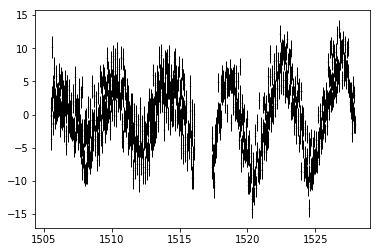

In [49]:
plt.errorbar(t, y, yerr=yerr, fmt=".k", lw=1,ms=1);
#plt.xlim(500,600)
#plt.xlim(1325,1385)

<Container object of 3 artists>

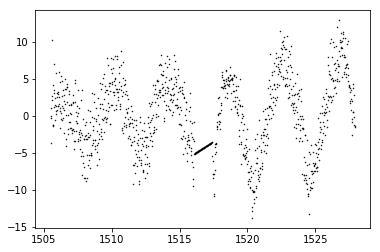

In [54]:
plt.errorbar(np.arange(t.min(), t.max(), delta_t), y_interp,fmt='.k',lw=1,ms=1)
#plt.xlim(1325,1385)

In [55]:
plt.errorbar(new_t, new_f,fmt='.k',lw=1,ms=1)
#plt.xlim(1325,1385)

NameError: name 'new_f' is not defined

4.156135683405387


Text(0,0.5,'LS periodogram')

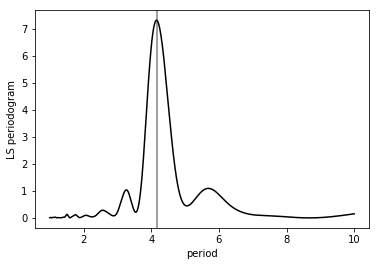

In [56]:
from astropy.timeseries import LombScargle

# First guess at the period
freq = np.linspace(1.0 / 10.0, 1.0 / 1.0, 5000)
model = LombScargle(t, y)
power = model.power(freq, method="fast", normalization="psd")
power /= len(t)

period = 1.0 / freq[np.argmax(power)]
print(period)

plt.plot(1.0 / freq, power, "k")

plt.axvline(period, color="k", alpha=0.5)
#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)

#plt.xlim(period - 1, period + 4)

plt.xlabel("period")
plt.ylabel("LS periodogram")

Text(0.5,0,'$\\tau$')

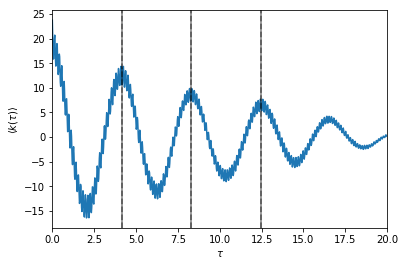

In [76]:
tau = np.arange(len(emp_acorr)) * delta_t
plt.plot(tau, emp_acorr)

plt.axvline(period, color="k", alpha=0.5)
plt.axvline(2*period, color="k", alpha=0.5)
plt.axvline(3*period, color="k", alpha=0.5)

#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

plt.axvline(period, color="k",ls="dashed", alpha=0.5)
plt.axvline(2*period, color="k",ls="dashed", alpha=0.5)
plt.axvline(3*period, color="k",ls="dashed", alpha=0.5)

plt.xlim(0, 20)
#plt.xlim(4.2,4.6)
#plt.ylim(.4,.6)
plt.ylabel(r"$\left< k(\tau) \right>$")
plt.xlabel(r"$\tau$")

In [77]:
emp_acorr_smooth = gaussian_filter1d(emp_acorr,1500*delta_t)
peakinds = find_peaks(emp_acorr_smooth)[0]
valinds = argrelmin(emp_acorr_smooth)[0]

Text(0.5,0,'$\\tau$')

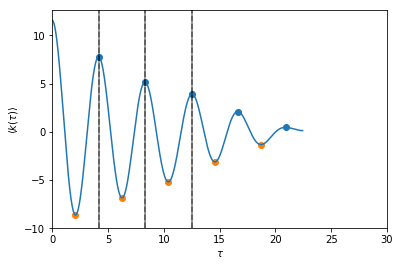

In [107]:
tau = np.arange(len(emp_acorr_smooth)) * delta_t
plt.plot(tau, emp_acorr_smooth)
plt.scatter(tau[peakinds],emp_acorr_smooth[peakinds])
plt.scatter(tau[valinds],emp_acorr_smooth[valinds])


plt.axvline(period, color="k", alpha=0.5)
plt.axvline(2*period, color="k", alpha=0.5)
plt.axvline(3*period, color="k", alpha=0.5)

#plt.axvline(3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(2*3.88, color="k",ls="dashed", alpha=0.5)
#plt.axvline(3*3.88, color="k",ls="dashed", alpha=0.5)

plt.axvline(period, color="k",ls="dashed", alpha=0.5)
plt.axvline(2*period, color="k",ls="dashed", alpha=0.5)
plt.axvline(3*period, color="k",ls="dashed", alpha=0.5)

#plt.xlim(0, 20)
#plt.xlim(240,280)
plt.xlim(0,30)
#plt.xlim(3.,6)
#plt.xlim(4.2,4.6)
#plt.ylim(.0,.6)
plt.ylabel(r"$\left< k(\tau) \right>$")
plt.xlabel(r"$\tau$")

In [79]:
#emp_acorr_smooth[peakinds[0]] - emp_acorr_smooth[peakinds[1]] > 0
peakheights = np.zeros(len(peakinds)-1) 
for i in range(len(peakinds)-1):
    peakheights[i] = np.mean((emp_acorr_smooth[peakinds[i]]-emp_acorr_smooth[valinds[i]], emp_acorr_smooth[peakinds[i]]-emp_acorr_smooth[valinds[i+1]]))

In [81]:
maxindx = np.argmax(peakheights)
if maxindx == 1:
    maxindx = 1

elif maxindx != 1:
    maxindx = 0
        
period=tau[peakinds[maxindx]]
maxheight=peakheights[maxindx]
#maxindx = np.argmax(peakheights)
#period=tau[peakinds[maxindx]]
period

4.162627159894328

In [83]:
tau[peakinds[np.argmax(peakheights)+1]] - period

4.141814024094856

In [84]:
integermults = [period * n for n in range(2,6)]

In [112]:
tau_prev = period
periodmults = np.array([])
linfit_peakinds = np.array([],dtype=int)
n = 1
for i in range(len(integermults)):
    for j in range(len(peakinds)):
        if (np.abs(integermults[i] - tau[peakinds[j]])/period <= 0.2) & ((tau[peakinds[j]]-tau_prev) > 0.3*period):
            print(i,j)
            periodmults = np.concatenate((periodmults,[tau[peakinds[j]]]))
            tau_prev = tau[peakinds[j]]
            linfit_peakinds = np.concatenate((linfit_peakinds,[np.int(j)]))
            n += 1
            
            

0 1
1 2
2 3
3 4


In [113]:
linfit_peakinds

array([1, 2, 3, 4])

In [94]:
#maxheight=peakheights[np.argmax(peakheights)]

In [86]:
maxheight/2

7.75862754046391

In [ ]:
#if maxindx == 0:
#    nearbyvals = [0,1]
#elif maxindx == 1:
#    nearbyvals = [1,2]

In [87]:
tauslice = tau[valinds[maxindx]:valinds[maxindx+1]]
acfslice = emp_acorr_smooth[valinds[maxindx]:valinds[maxindx+1]]

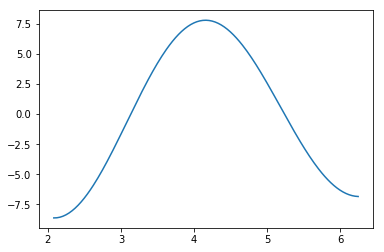

In [88]:
plt.plot(tauslice,acfslice)

In [89]:
absdiffs = np.abs(acfslice - maxheight/2)
minval1 = np.argmin(absdiffs)
absdiffs=np.delete(absdiffs,minval1)
minval2 = np.argmin(absdiffs)

In [90]:
sigma_from_fwhm = (np.abs(period - tauslice[minval1]) + np.abs(period - tauslice[minval2]))/2.35482004503
sigma_from_fwhm

0.0353540999337068

In [114]:
linfit_peakinds = np.concatenate(([maxindx],linfit_peakinds))

In [115]:
linfit_peakinds += 1

In [116]:

linfit_peakinds = np.concatenate(([0],linfit_peakinds))
linfit_peakinds

array([0, 1, 2, 3, 4, 5])

In [117]:
periodmults = np.concatenate(([0,period],periodmults))

In [118]:
periodmults

array([ 0.        ,  4.16262716,  8.30444118, 12.52950775, 16.6296955 ,
       20.91720148])

In [119]:
#emp_acorr_smooth[peakinds[linfit_peakinds]]

In [126]:
np.polyfit(linfit_peakinds,periodmults,1)[0]

4.177493685465378

In [121]:
period

4.162627159894328

In [122]:
period_diffs = np.diff(periodmults)
finalperiod = np.median(period_diffs)
finalperiod

4.162627159894328

In [123]:
period

4.162627159894328

In [124]:
period_unc = 1.483* median_absolute_deviation(period_diffs) / np.sqrt(n-1)

In [125]:
period_unc

0.0686426314006919

In [176]:
periodz

4.991907696860605